# 1.) ARRANGING THE DATA 

In [547]:
# To facilitate the reading of the data by any kind of operating system. Already converted to date time since I know which variables need to be converted in advance.
#I´ve allowed to infer_datetime_format since I already converted all the dates when merging the variables and obtaining the targets datasets, so I know how do they look
#like although pandas haven´t identified them as dt.
path_df=os.path.join("df_features.csv"); df_features=pd.read_csv(path_df,parse_dates=True);df_features["Date"]=pd.to_datetime(df_features["Date"], 
                                                                                                                              infer_datetime_format=True)
path_sr=os.path.join("Targets_.csv"); df_targets=pd.read_csv(path_sr,parse_dates=True);df_targets["Date"]=pd.to_datetime(df_targets["year"],
                                                                                                                           format="%Y");


#Creating copies to work with them
df_features1=df_features.copy()
# Will try first to change all the "-" strings into np.nan values to see the amount of missing information and then decide what to do with it.
df_targets1=df_targets.copy();df_targets1.replace(" -   ",value=1.0, inplace=True)

df_features1.info(); df_targets1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1239 entries, 0 to 1238
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Unnamed: 0                              1239 non-null   int64         
 1   Country Name                            1239 non-null   object        
 2   Country Code                            1239 non-null   object        
 3   Date                                    1239 non-null   datetime64[ns]
 4   GDP/capita(USD $)                       1239 non-null   float64       
 5   GDP/capita (USD $)^2                    1239 non-null   float64       
 6   GDP growth (annual %)                   1236 non-null   float64       
 7   CPI(2010=100)                           1182 non-null   float64       
 8   Bank_Branches_per_100k_adults           1196 non-null   float64       
 9   Individuals_using_Internet(%pop)        1239 non-nul

In [548]:
#Checking the initial amount of instances, features and different countries in both datasets considered
print("The number of countries in the features´ dataset is:", df_features1["Country Name"].nunique())
print("The shape of the features´dataset considered is:", df_features1.shape)

print("The number of countries in trargets´dataset is:", df_targets1["Country Name"].nunique())
print("The shape of the targets´dataset considered is:", df_targets1.shape)

The number of countries in the features´ dataset is: 169
The shape of the features´dataset considered is: (1239, 29)
The number of countries in trargets´dataset is: 100
The shape of the targets´dataset considered is: (665, 11)


In [549]:
#With the help of the previous .info() I am printing the columns Im interested in, columns 3 till 9
print(df_targets1.columns[4:9]) 

#Changing the dtypes to the correct format
convert_dict={'Bigtech_credit':float, 'Fintech_credit ':float,
       'Total_alternative_credit':float, 'Bigtech_credit/capita':float,
       'Fintech_credit/capita':float, 'Total_domestic_credit_by_financial_sector':float}

df_targets1=df_targets1.astype(convert_dict);df_targets1.info()

Index(['Fintech_credit ', 'Total_alternative_credit', 'Bigtech_credit/capita',
       'Fintech_credit/capita', 'Total_Alternative_Credit/capita'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   year                                       665 non-null    int64         
 1   ISO2                                       665 non-null    object        
 2   Country Name                               665 non-null    object        
 3   Bigtech_credit                             665 non-null    float64       
 4   Fintech_credit                             665 non-null    float64       
 5   Total_alternative_credit                   665 non-null    float64       
 6   Bigtech_credit/capita                      665 non-null    float64       
 7   Fintech_cr

In [550]:
df_targets1["Total_alternative_credit"]=df_targets1['Fintech_credit ']+df_targets1["Bigtech_credit"]

## Alternative Credit Plotting

In [551]:
top_10_countries=pd.DataFrame(df_targets1.groupby("Country Name")['Fintech_credit '].sum()).sort_values(by='Fintech_credit ',ascending=False).reset_index()
top_10_country_names=top_10_countries["Country Name"][:11]
top_10_country_names

0                        China
1     United States of America
2               United Kingdom
3                  Netherlands
4                    Indonesia
5                        Japan
6                  Korea, Rep.
7                    Australia
8                      Germany
9                       France
10                      Israel
Name: Country Name, dtype: object

In [552]:

Ft_countries=["China", "United States of America","Australia",
             "United Kingdom", "Netherlands", "Indonesia","Japan",
              "Netherlands","Korea, Rep.","Germany","France","Israel"] 

Ft_TOP=df_targets1[df_targets["Country Name"].isin(Ft_countries)];Ft_TOP.drop("year",axis=1,inplace=True)


C:\Users\Pedro Romero\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [553]:
top_10_countries=pd.DataFrame(df_targets1.groupby("Country Name")['Bigtech_credit'].sum()).sort_values(by='Bigtech_credit',ascending=False).reset_index()
top_10_country_names=top_10_countries["Country Name"][:11]
top_10_country_names

0                        China
1                        Japan
2                  Korea, Rep.
3           Russian Federation
4     United States of America
5                        Kenya
6                    Indonesia
7                     Tanzania
8                        Ghana
9                     Thailand
10                    Pakistan
Name: Country Name, dtype: object

## Winsorizing the targets´ as in Cornelli et al. 2020

In [554]:
from scipy.stats.mstats import winsorize

df_win=df_targets1.copy();df_win=df_win.drop(columns="year")

df_win["log_Fintech_credit"]=np.log(df_win["Fintech_credit "])
df_win["log_Total_Alternative_credit"]=np.log(df_win["Total_alternative_credit"])
df_win["log_Bigtech_credit"]=np.log(df_win["Bigtech_credit"])


#Winsorizing the dependent variables at the 1% and 99% to treat outliers
winsorize(df_win["log_Total_Alternative_credit"],limits=(0.01,0.01),inplace=True)
winsorize(df_win["log_Fintech_credit"],limits=(0.01,0.01),inplace=True)
winsorize(df_win["log_Bigtech_credit"],limits=(0.01,0.01),inplace=True)
          
df_win.describe()

,Bigtech_credit,Fintech_credit,Total_alternative_credit,Bigtech_credit/capita,Fintech_credit/capita,Total_Alternative_Credit/capita,Total_domestic_credit_by_financial_sector,log_Fintech_credit,log_Total_Alternative_credit,log_Bigtech_credit
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,6.650000e+02,665.000000,665.000000,665.000000
mean,1933.115459,2093.365083,4026.480541,4.601654,7.168075,10.614842,9.160644e+05,1.938603,2.740325,0.882724
std,25453.116254,19785.632663,40837.907289,24.924749,24.832024,40.084939,3.161376e+06,2.784334,2.580069,2.198129
min,0.200000,0.010000,0.730000,0.010000,0.010000,0.000000,1.000000e+00,-3.912023,0.019803,0.000000
25%,1.000000,1.000000,2.000000,1.000000,0.190000,0.000000,1.000000e+00,0.000000,0.693147,0.000000
50%,1.000000,3.110000,5.040000,1.000000,1.000000,0.150000,3.055600e+04,1.134623,1.617406,0.000000
75%,1.000000,40.060000,92.310000,1.000000,1.180000,2.800000,4.020960e+05,3.690378,4.525152,0.000000
max,515877.730000,356039.280000,626713.620000,368.470000,256.130000,447.640000,3.021804e+07,10.962462,10.980097,9.698935


In [555]:
df_data=pd.merge(df_win,df_features1)
df_data.columns

Index(['ISO2', 'Country Name', 'Bigtech_credit', 'Fintech_credit ',
       'Total_alternative_credit', 'Bigtech_credit/capita',
       'Fintech_credit/capita', 'Total_Alternative_Credit/capita',
       'Total_domestic_credit_by_financial_sector', 'Date',
       'log_Fintech_credit', 'log_Total_Alternative_credit',
       'log_Bigtech_credit', 'Unnamed: 0', 'Country Code', 'GDP/capita(USD $)',
       'GDP/capita (USD $)^2', 'GDP growth (annual %)', 'CPI(2010=100)',
       'Bank_Branches_per_100k_adults', 'Individuals_using_Internet(%pop)',
       'Lerner Index', 'Starting a business - Score', 'Score-Time(days)',
       'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)',
       'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)',
       'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)',
       'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)',
       'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)',
       'Domestic_credit_provided_FSect

In [556]:
# Cleaning both, the df and the series from unwanted variables, since I know what should be there as I integrated the datasets myself. 
selected={"Unnamed: 0","ISO2", "Fintech_credit ","Total_alternative_credit", "Fintech_credit/capita",
          'Bigtech_credit','Bigtech_credit/capita', "Total_Alternative_Credit/capita",
         'BK_Crisis_Dummy'}
df_data=df_data.drop(columns=selected);

In [557]:
#Creating a new path to join the Income Level of the data
pth_Income=os.path.join("Income_Level.csv");df_income=pd.read_csv(pth_Income)
df_data1=pd.merge(df_data,df_income)

#There´s an extra category which i´d like to get ridd off
df_data1=df_data1[df_data1["Income Leve"]!='Low & middle income']

print("The number of countries in trargets´dataset is:", df_data1["Country Name"].nunique())
print("The shape of the targets´dataset considered is:", df_data1.shape)

The number of countries in trargets´dataset is: 90
The shape of the targets´dataset considered is: (481, 32)


In [558]:
df_data1.columns

Index(['Country Name', 'Total_domestic_credit_by_financial_sector', 'Date',
       'log_Fintech_credit', 'log_Total_Alternative_credit',
       'log_Bigtech_credit', 'Country Code', 'GDP/capita(USD $)',
       'GDP/capita (USD $)^2', 'GDP growth (annual %)', 'CPI(2010=100)',
       'Bank_Branches_per_100k_adults', 'Individuals_using_Internet(%pop)',
       'Lerner Index', 'Starting a business - Score', 'Score-Time(days)',
       'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)',
       'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)',
       'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)',
       'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)',
       'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)',
       'Domestic_credit_provided_FSector(%GDP)',
       'Stockstraded_totalvalue(%GDP)', 'MobPhone_Subcrip(per100adults)',
       'R&D_Expenditure(%GDP)', 'Financial Institutions Access Index',
       'Income Leve'],
      dtype='o

In [559]:
#I´ve included also the regions and subregions of each of the countries in the data. The main intution is to impute for instancesome of variables by grouping based on
#which regions the countries are placed in. I´ve read the PDF document to extract that information
pt_areas=os.path.join("all.txt");df_areas=pd.read_table(pt_areas,sep=",", header=0,engine="python")
df_areas=df_areas.loc[:,["name","region","sub-region","alpha-3"]]
#Once I merged the data using the country´s unique code identifier I dropped(name==Country Name) & (alpha-3==Country Code)
#since i don´t want  to be repeated
df_data2=pd.merge(df_data1,df_areas,left_on="Country Code",right_on="alpha-3");df_data2.drop(["name","alpha-3"]
                                                                                             ,axis=1,inplace=True)

#This is just a formality, I´ve changed the order of the columns so its more clear at the time of presenting the dfs
columns=['Date','Country Name', 'Country Code',"Income Leve",'region','sub-region','log_Fintech_credit','log_Total_Alternative_credit', "log_Bigtech_credit",#HERE ARE ALL THE TARGETS AT ONCE
        
       'Total_domestic_credit_by_financial_sector','GDP/capita(USD $)','GDP/capita (USD $)^2', #HERE ONWARDS START THE DIFFERENT FEATURES CONSIDERED
       'GDP growth (annual %)', 'CPI(2010=100)',
       'Bank_Branches_per_100k_adults', 'Individuals_using_Internet(%pop)',
       'Lerner Index', 'Starting a business - Score', 'Score-Time(days)',
       'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)',
       'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)',
       'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)',
       'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)',
       'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)',
       'Domestic_credit_provided_FSector(%GDP)',
       'Stockstraded_totalvalue(%GDP)', 'MobPhone_Subcrip(per100adults)',
       'R&D_Expenditure(%GDP)', 'Financial Institutions Access Index']

df_data2=df_data2.reindex(columns=columns)


In [560]:
#Having a look at the output
pth_reg_string=os.path.join("Reg_Strin.csv")
df_reg_string=pd.read_csv(pth_reg_string)

df_data2=pd.merge(df_data2,df_reg_string)
df_data2.info();print("The final outlook of the data:",df_data2.shape, "|"
                                                 "Total Number of countries:",df_data2["Country Name"].nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 0 to 425
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Date                                       426 non-null    datetime64[ns]
 1   Country Name                               426 non-null    object        
 2   Country Code                               426 non-null    object        
 3   Income Leve                                426 non-null    object        
 4   region                                     426 non-null    object        
 5   sub-region                                 426 non-null    object        
 6   log_Fintech_credit                         426 non-null    float64       
 7   log_Total_Alternative_credit               426 non-null    float64       
 8   log_Bigtech_credit                         426 non-null    float64       
 9   Total_domestic_credit

### So I finally have the datasets merged. My dataset is containing 426 instances, 39 variables and 80 different countries.

# 1.) Exploratory Data Analysis & Missing Values Handling

In [16]:
#Same information. This time expressed as percentage of missing observations in the overall dataset. 
#Note that from the dependent variables more than 50% of observations are missing. For FinTech Credit volumes and volumes per capita "just" 20% of the information is 
#missing. For Total Alterntive Credit 66%, however, for total alternative credit/capita there´s no information missing at all.b
round((1-(df_data2.loc[:,"log_Fintech_credit":"Regulatory_Stringency_Index"].count())/len(df_data2))*100,2)

log_Fintech_credit                            0.00
log_Total_Alternative_credit                  0.00
log_Bigtech_credit                            0.00
Total_domestic_credit_by_financial_sector     0.00
GDP/capita(USD $)                             0.00
GDP/capita (USD $)^2                          0.00
GDP growth (annual %)                         0.00
CPI(2010=100)                                 0.00
Bank_Branches_per_100k_adults                 3.52
Individuals_using_Internet(%pop)              0.00
Lerner Index                                 73.00
Starting a business - Score                   2.58
Score-Time(days)                              0.00
Score-Paid-Min-Capital                        0.00
Score-Cost(%income/capita)                    0.00
Enforcement_fees(%claim)                      2.58
Enforcement_ judgement(days)                  2.58
Cost_Enforc_contracts(%claim)                 2.58
Bk_reg_capital_to_RWA(%)                     26.06
Provisions_nonperf_loans(%)    

## 1.1 )Missing Values Visualizations

Missing information shouldn´t just be corrected for, but also analysed. Features´ containing missing values may also provide information of underlying patterns in the data. Furthermore, it 
is relevant to determine whether one of the variables might be also influencing the presence of the observations of a different feature in the dataset. To this end, Figure (X) offers a first glance overlook of the missing information in the dataset. Information is offered in the form of a heatmap, where those instances coloured in yellow alert of the presence of NaN values for that particular feature considered. Figure (X2) presents information concerning the pair-wise missing values correlations. 

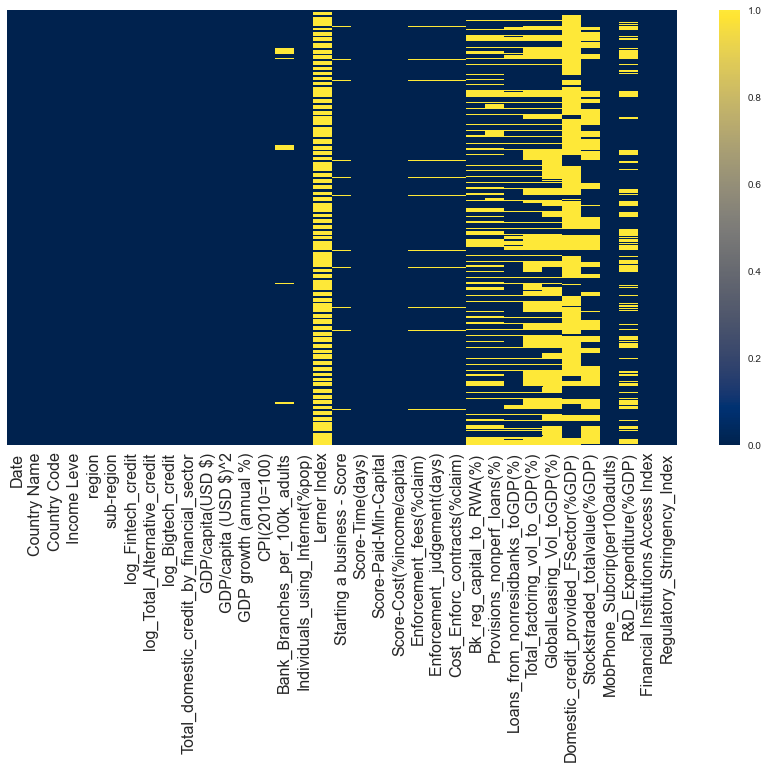

In [17]:
f, ax = plt.subplots(figsize = (15,8))

g=sns.heatmap(df_data2.isna(),cmap="cividis",robust=True,yticklabels=False)
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 16)
plt.savefig("Nan_Heatmap");

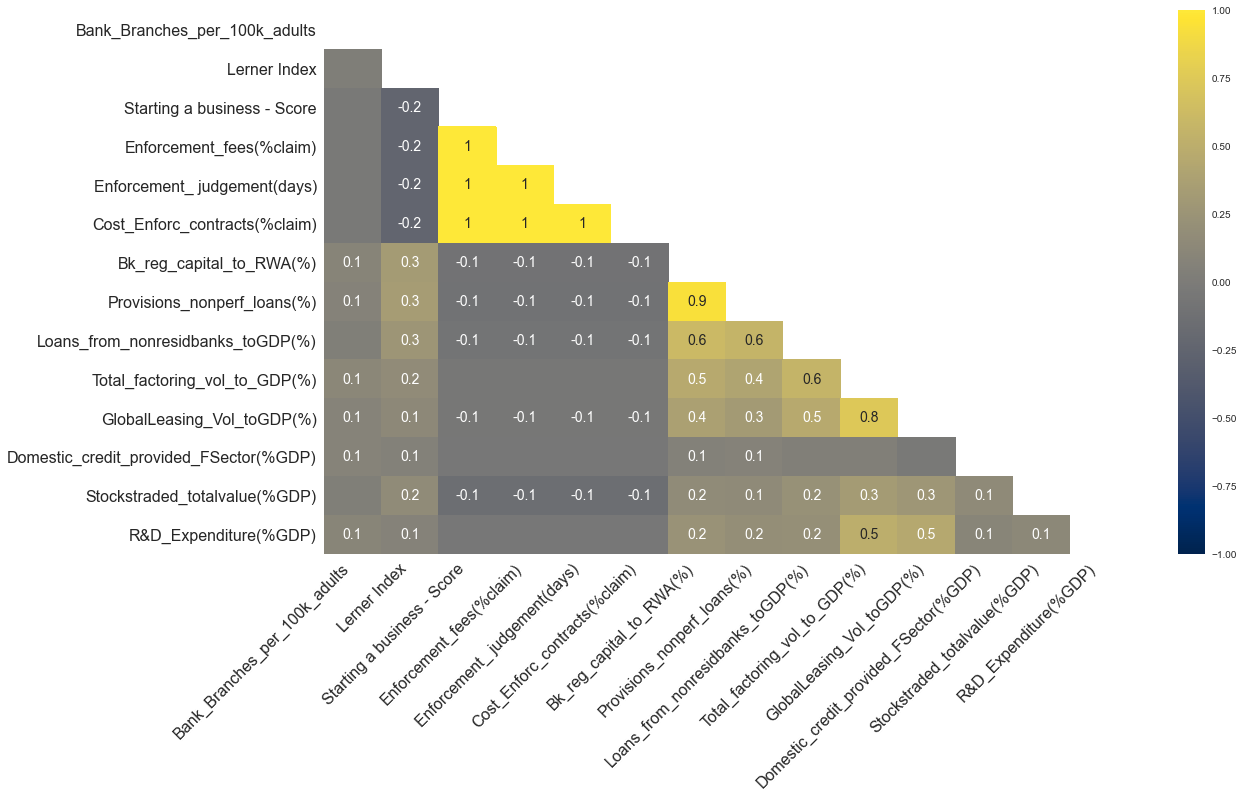

In [18]:
### Correlation between pairs of missing values 
import missingno as msno
msno.heatmap(df_data2,  cmap="cividis",figsize=(18,10))


## 1.2) Proper Imputations of the data

Different imputation techniques will be employed. Depending on the variable, imputations will be performed using the algorithms, iterative imputer or KNNImputer.

In [561]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

KNN_imputer= KNNImputer(n_neighbors=6, weights="distance", metric="nan_euclidean")

Impute_it=IterativeImputer(missing_values=np.nan,
                           initial_strategy="median",imputation_order="descending",
                           n_nearest_features=None,max_iter=1000)


In [562]:
print("This country has at least one missing observations- Total Domestic Credit provided by the Financial Sector:"
       + df_data2[df_data2["Total_domestic_credit_by_financial_sector"].isna()]["Country Name"].unique())

[]


### Total Domestic Credit by the Financial Sector

In [21]:
df_data2["Total_domestic_credit_by_financial_sector"].value_counts()

1.0          29
1906613.0     1
108959.0      1
15464.0       1
514120.0      1
             ..
4411061.0     1
2443910.0     1
2544451.0     1
240091.0      1
4396589.0     1
Name: Total_domestic_credit_by_financial_sector, Length: 398, dtype: int64

In [22]:
#Gergia. Although not missing information for none of the targets´ considered, the total domestic credit by the financial sector is missing in full.
df_data2[df_data2["Country Name"]=="Georgia"].isnull().sum()

Date                                         0
Country Name                                 0
Country Code                                 0
Income Leve                                  0
region                                       0
sub-region                                   0
log_Fintech_credit                           0
log_Total_Alternative_credit                 0
log_Bigtech_credit                           0
Total_domestic_credit_by_financial_sector    0
GDP/capita(USD $)                            0
GDP/capita (USD $)^2                         0
GDP growth (annual %)                        0
CPI(2010=100)                                0
Bank_Branches_per_100k_adults                0
Individuals_using_Internet(%pop)             0
Lerner Index                                 4
Starting a business - Score                  0
Score-Time(days)                             0
Score-Paid-Min-Capital                       0
Score-Cost(%income/capita)                   0
Enforcement_f

In [23]:
df_data2[df_data2["Country Name"]=="Georgia"]["Total_domestic_credit_by_financial_sector"]

413    1.0
414    1.0
415    1.0
416    1.0
417    1.0
418    1.0
Name: Total_domestic_credit_by_financial_sector, dtype: float64

In [563]:
# Employing data available from the IMF and the pertinent currency exchange rates at the end of each year with respect to the USD, the values 
#have been replaced with their respective values. 
df_data2.loc[413, "Total_domestic_credit_by_financial_sector"]=3655.70
df_data2.loc[414, "Total_domestic_credit_by_financial_sector"]=4509.81
df_data2.loc[415, "Total_domestic_credit_by_financial_sector"]=5314.24
df_data2.loc[416,"Total_domestic_credit_by_financial_sector"]=6503.80
df_data2.loc[417,"Total_domestic_credit_by_financial_sector"]=7409.49
df_data2.loc[418,"Total_domestic_credit_by_financial_sector"]=8913.92

In [25]:
#Will be dropped directly since it does not have any kind of information on the targets considered.
df_data2[df_data2["Country Name"]=="Iceland"]

,Date,Country Name,Country Code,Income Leve,region,sub-region,log_Fintech_credit,log_Total_Alternative_credit,log_Bigtech_credit,Total_domestic_credit_by_financial_sector,...,Provisions_nonperf_loans(%),Loans_from_nonresidbanks_toGDP(%),Total_factoring_vol_to_GDP(%),GlobalLeasing_Vol_toGDP(%),Domestic_credit_provided_FSector(%GDP),Stockstraded_totalvalue(%GDP),MobPhone_Subcrip(per100adults),R&D_Expenditure(%GDP),Financial Institutions Access Index,Regulatory_Stringency_Index
419,2018-01-01,Iceland,ISL,High income,Europe,Northern Europe,0.0,0.693147,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,122.169622,2.02994,0.747201,0.888889


In [26]:
#Liberia. Same imputation strategy as for Georgia. 
df_data2[df_data2["Country Name"]=="Liberia"].isnull().sum()

Date                                         0
Country Name                                 0
Country Code                                 0
Income Leve                                  0
region                                       0
sub-region                                   0
log_Fintech_credit                           0
log_Total_Alternative_credit                 0
log_Bigtech_credit                           0
Total_domestic_credit_by_financial_sector    0
GDP/capita(USD $)                            0
GDP/capita (USD $)^2                         0
GDP growth (annual %)                        0
CPI(2010=100)                                0
Bank_Branches_per_100k_adults                0
Individuals_using_Internet(%pop)             0
Lerner Index                                 5
Starting a business - Score                  0
Score-Time(days)                             0
Score-Paid-Min-Capital                       0
Score-Cost(%income/capita)                   0
Enforcement_f

In [564]:
print(df_data2[df_data2["Country Name"]=="Liberia"]["Total_domestic_credit_by_financial_sector"])

df_data2.loc[420, "Total_domestic_credit_by_financial_sector"]=3583.02
df_data2.loc[421, "Total_domestic_credit_by_financial_sector"]=3444.11
df_data2.loc[422, "Total_domestic_credit_by_financial_sector"]=3442.22
df_data2.loc[423,"Total_domestic_credit_by_financial_sector"]=3556.75
df_data2.loc[424,"Total_domestic_credit_by_financial_sector"]=5461.57

420    1.0
421    1.0
422    1.0
423    1.0
424    1.0
Name: Total_domestic_credit_by_financial_sector, dtype: float64


In [28]:
#Luxembourg
df_data2[df_data2["Country Name"]=="Luxembourg"].isnull().sum()

Date                                         0
Country Name                                 0
Country Code                                 0
Income Leve                                  0
region                                       0
sub-region                                   0
log_Fintech_credit                           0
log_Total_Alternative_credit                 0
log_Bigtech_credit                           0
Total_domestic_credit_by_financial_sector    0
GDP/capita(USD $)                            0
GDP/capita (USD $)^2                         0
GDP growth (annual %)                        0
CPI(2010=100)                                0
Bank_Branches_per_100k_adults                0
Individuals_using_Internet(%pop)             0
Lerner Index                                 1
Starting a business - Score                  0
Score-Time(days)                             0
Score-Paid-Min-Capital                       0
Score-Cost(%income/capita)                   0
Enforcement_f

In [565]:
df_data2.loc[424,"Total_domestic_credit_by_financial_sector"]=112045

In [566]:
df_data2=df_data2[df_data2["Country Name"]!="Bahrain"]
df_data2=df_data2[df_data2["Country Name"]!="Cabo Verde"]
df_data2=df_data2[df_data2["Country Name"]!="Iceland"]

#Now imputations will be performed using KNNImputer
df_data2["Total_domestic_credit_by_financial_sector"]=KNN_imputer.fit_transform(df_data2[["Total_domestic_credit_by_financial_sector"]]).ravel()
print("Total number of missing observations after the imputation:", df_data2["Total_domestic_credit_by_financial_sector"].isnull().sum())


Total number of missing observations after the imputation: 0


### 1.2.2) Commercial Bank Branches (3.81% of missing information). Measured in absolute terms

In [567]:
df_data2["Bank_Branches_per_100k_adults"]=KNN_imputer.fit_transform(df_data2[["Bank_Branches_per_100k_adults"]]).ravel()
print("Amount of missing values after imputation:",df_data2["Bank_Branches_per_100k_adults"].isnull().sum())

Amount of missing values after imputation: 0


### 1.2.3) Lerner Index (73.00% of missing information)

In [568]:
#More complex technique that will be further explained in the document
df_data2["Lerner Index"]=Impute_it.fit_transform(df_data2[["Lerner Index"]]).ravel()
print("Missing Values after imputation:",df_data2["Lerner Index"].isna().sum())

Missing Values after imputation: 0


### 1.2.4) Starting a Business- Score (2.58% of missing information).

In [569]:
df_data2[df_data2["Starting a business - Score"].isna()]

,Date,Country Name,Country Code,Income Leve,region,sub-region,log_Fintech_credit,log_Total_Alternative_credit,log_Bigtech_credit,Total_domestic_credit_by_financial_sector,...,Provisions_nonperf_loans(%),Loans_from_nonresidbanks_toGDP(%),Total_factoring_vol_to_GDP(%),GlobalLeasing_Vol_toGDP(%),Domestic_credit_provided_FSector(%GDP),Stockstraded_totalvalue(%GDP),MobPhone_Subcrip(per100adults),R&D_Expenditure(%GDP),Financial Institutions Access Index,Regulatory_Stringency_Index
16,2013-01-01,Bangladesh,BGD,Lower middle income,Asia,Southern Asia,0.000000,0.693147,0.000000,93427.0,...,43.9442,3.018860,NaN,NaN,NaN,0.823999,76.297456,NaN,0.116211,0.882353
48,2013-01-01,Brazil,BRA,Upper middle income,Americas,Latin America and the Caribbean,-0.223144,0.587787,0.000000,2472665.0,...,161.0510,11.891800,1.694140,0.16,NaN,29.912498,134.851428,1.19567,0.733093,0.925926
69,2013-01-01,China,CHN,Upper middle income,Asia,Eastern Asia,8.479265,8.479473,0.000000,15047280.0,...,282.7160,3.033970,5.225820,1.11,NaN,80.414361,88.305749,1.99786,0.300578,0.961538
147,2013-01-01,Indonesia,IDN,Upper middle income,Asia,South-eastern Asia,-0.693147,0.405465,0.000000,385949.0,...,50.9090,6.670840,0.119149,NaN,43.429264,10.833436,124.392499,0.08470,0.391330,0.896552
164,2013-01-01,India,IND,Lower middle income,Asia,Southern Asia,1.345472,1.576915,0.000000,1446699.0,...,47.3531,3.860350,0.374712,NaN,NaN,28.963804,69.196994,0.70642,0.192243,0.928571
181,2013-01-01,Japan,JPN,High income,Asia,Eastern Asia,4.363608,9.008963,8.999311,12989181.0,...,24.3888,7.672940,1.989530,1.11,339.550706,117.988744,115.254273,3.31496,0.884456,0.793103
235,2013-01-01,Mexico,MEX,Upper middle income,Americas,Latin America and the Caribbean,-0.248461,0.576613,0.000000,448829.0,...,147.5410,13.581600,2.923450,0.40,48.472481,12.844188,89.834152,0.42503,0.395912,0.896552
252,2013-01-01,Nigeria,NGA,Lower middle income,Africa,Sub-Saharan Africa,1.196948,1.460938,0.000000,108959.0,...,55.8185,0.915594,NaN,0.24,NaN,1.224295,74.081150,NaN,0.127279,0.965517
291,2013-01-01,Pakistan,PAK,Lower middle income,Asia,Southern Asia,0.000000,4.630155,4.620354,114479.0,...,78.4292,0.670361,NaN,NaN,NaN,0.243449,66.786964,0.29285,0.129378,0.896552
314,2013-01-01,Russian Federation,RUS,Upper middle income,Europe,Eastern Europe,0.000000,7.712028,7.711580,1010053.0,...,71.0516,12.003600,2.425290,1.22,NaN,10.273182,151.255633,1.02524,0.936519,0.896552


In [570]:
df_data2[df_data2["Country Name"]=="Bangladesh"] #Will be directly replaced. Since it does not have any kind of information with regards to the targets

,Date,Country Name,Country Code,Income Leve,region,sub-region,log_Fintech_credit,log_Total_Alternative_credit,log_Bigtech_credit,Total_domestic_credit_by_financial_sector,...,Provisions_nonperf_loans(%),Loans_from_nonresidbanks_toGDP(%),Total_factoring_vol_to_GDP(%),GlobalLeasing_Vol_toGDP(%),Domestic_credit_provided_FSector(%GDP),Stockstraded_totalvalue(%GDP),MobPhone_Subcrip(per100adults),R&D_Expenditure(%GDP),Financial Institutions Access Index,Regulatory_Stringency_Index
16,2013-01-01,Bangladesh,BGD,Lower middle income,Asia,Southern Asia,0.0,0.693147,0.0,93427.0,...,43.9442,3.01886,NaN,NaN,NaN,0.823999,76.297456,NaN,0.116211,0.882353
17,2014-01-01,Bangladesh,BGD,Lower middle income,Asia,Southern Asia,0.0,0.693147,0.0,110447.0,...,42.0842,NaN,NaN,NaN,NaN,NaN,82.104738,NaN,0.122203,0.882353
18,2015-01-01,Bangladesh,BGD,Lower middle income,Asia,Southern Asia,0.0,0.693147,0.0,125335.0,...,36.7097,NaN,NaN,NaN,NaN,NaN,84.077086,NaN,0.129979,0.882353
19,2016-01-01,Bangladesh,BGD,Lower middle income,Asia,Southern Asia,0.0,0.693147,0.0,144774.0,...,NaN,NaN,NaN,NaN,NaN,NaN,86.076906,NaN,0.135374,0.882353


In [571]:
df_data2=df_data2[df_data2["Country Name"]!="Bangladesh"]

In [572]:
#The rest will be imputed using KNNneighbors
df_data2["Starting a business - Score"]=KNN_imputer.fit_transform(df_data2[["Starting a business - Score"]]).ravel()
print("Starting a business - Score:",df_data2["Starting a business - Score"].isnull().sum())


Starting a business - Score: 0


### 1.2.5) Enforcement_fees(%claim) Enforcement_ judgement(days) & Cost_Enforc_contracts(%claim) (2.58% of missing information).

In [573]:
df_data2["Enforcement_ judgement(days)"]=KNN_imputer.fit_transform(df_data2[["Enforcement_ judgement(days)"]]).ravel()
df_data2["Enforcement_fees(%claim)"]=KNN_imputer.fit_transform(df_data2[["Enforcement_fees(%claim)"]]).ravel()
df_data2["Cost_Enforc_contracts(%claim)"]=KNN_imputer.fit_transform(df_data2[["Cost_Enforc_contracts(%claim)"]]).ravel()

### 1.2.6)Upcoming ones present too much missing information and imputations will be performed on the basis of KNN

In [574]:
df_data2["Bk_reg_capital_to_RWA(%)"]=KNN_imputer.fit_transform(df_data2[["Bk_reg_capital_to_RWA(%)"]]).ravel()
df_data2["Provisions_nonperf_loans(%)"]=KNN_imputer.fit_transform(df_data2[["Provisions_nonperf_loans(%)"]]).ravel()
df_data2["Loans_from_nonresidbanks_toGDP(%)"]=KNN_imputer.fit_transform(df_data2[["Loans_from_nonresidbanks_toGDP(%)"]]).ravel()
df_data2["Total_factoring_vol_to_GDP(%)"]=KNN_imputer.fit_transform(df_data2[["Total_factoring_vol_to_GDP(%)"]]).ravel()
df_data2["GlobalLeasing_Vol_toGDP(%)"]=KNN_imputer.fit_transform(df_data2[["GlobalLeasing_Vol_toGDP(%)"]]).ravel()
df_data2["Stockstraded_totalvalue(%GDP)"]=KNN_imputer.fit_transform(df_data2[["Stockstraded_totalvalue(%GDP)"]]).ravel()
df_data2["R&D_Expenditure(%GDP)"]=KNN_imputer.fit_transform(df_data2[["R&D_Expenditure(%GDP)"]]).ravel()

### 1.2.7) Total Domestic Credit as (%) of GDP will directly be dismissed. (74.88% of missing information)

In [575]:
df_data2.drop(columns="Domestic_credit_provided_FSector(%GDP)",inplace=True)

# DATASET CLEANED FROM MISSING VALUES

In [576]:
df_data2.shape

(410, 34)

In [577]:
df_data2["Country Name"].nunique()

76

In [50]:
df_countries=pd.DataFrame(data=df_data2.loc[:,["Country Name","Country Code","Income Leve"]])
df_countries.drop_duplicates(keep='first', inplace=True)
df_countries.to_csv("Countries.csv")

## (EDA) Some basic Visualizations

In [64]:
df_data2["sub-region"].unique()

array(['Latin America and the Caribbean', 'Western Europe',
       'Australia and New Zealand', 'Sub-Saharan Africa',
       'Eastern Europe', 'Northern America', 'Eastern Asia',
       'Northern Europe', 'Southern Europe', 'South-eastern Asia',
       'Western Asia', 'Southern Asia', 'Northern Africa'], dtype=object)

In [65]:
#Imputed the nan values 
df_data2["CPI(2010=100)"]=df_data2.groupby(by="sub-region")["CPI(2010=100)"].transform(lambda x: x.fillna(x.mean()))


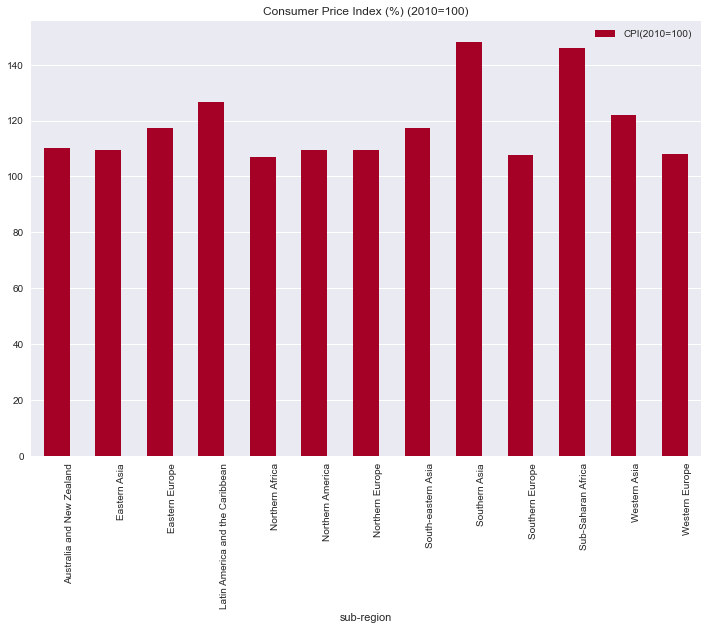

In [66]:
CPI=df_data2["CPI(2010=100)"].groupby(df_data2["sub-region"]).mean().to_frame()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.50

CPI.plot.bar(figsize=(12,8),width = width,ax=ax,rot=0,position=1,color= plt.cm.RdYlGn(np.linspace(0,10,10)))
plt.xticks(rotation=90)
plt.title("Consumer Price Index (%) (2010=100)");
plt.grid( which='major', axis='x')
plt.show();

In [67]:
# The graph already advised that probably the missing values came from the sub-region Central Asia. From the value counts one can actually determine that indeed the 6 values that
#are still missing are due to the Central Asia Region. Based on the report from the IMF "Analytical Report on Inflation in Consumer Price Index for Food", ill fill those nan
#values with the 
df_data2["sub-region"].value_counts()

Sub-Saharan Africa                 79
Latin America and the Caribbean    71
Northern Europe                    52
Western Europe                     36
Western Asia                       34
Eastern Europe                     30
South-eastern Asia                 29
Southern Europe                    24
Eastern Asia                       17
Northern America                   11
Southern Asia                      11
Australia and New Zealand          10
Northern Africa                     6
Name: sub-region, dtype: int64

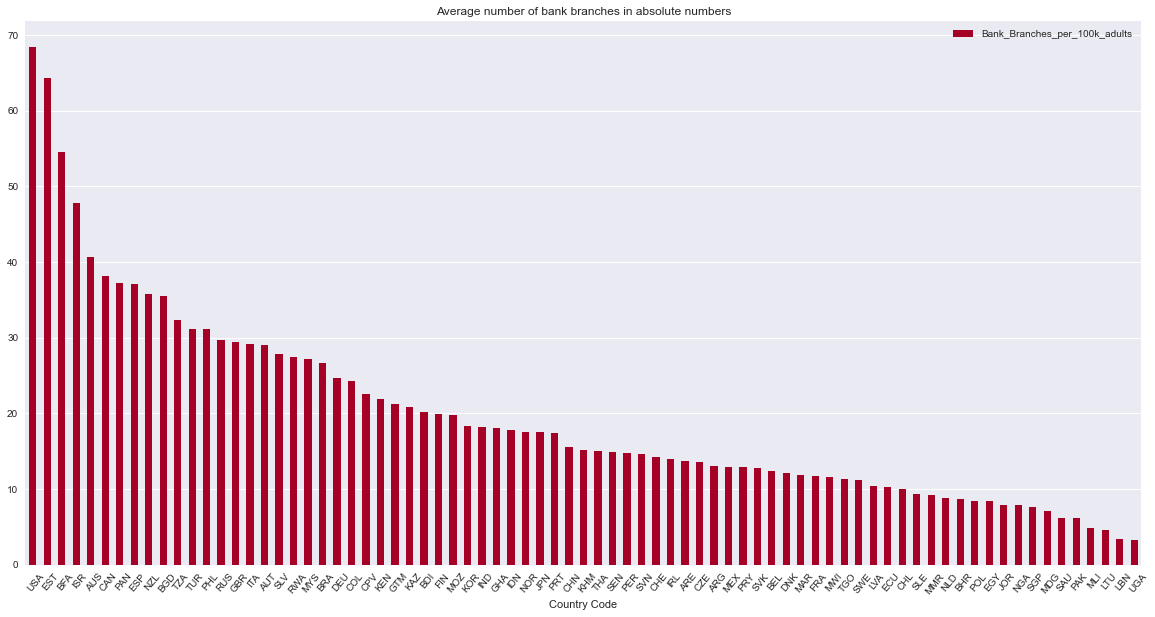

In [68]:
bank_branches=df_data2["Bank_Branches_per_100k_adults"].groupby(df_data["Country Code"]).mean().to_frame()
bank_branches=bank_branches.nlargest(100, "Bank_Branches_per_100k_adults")

fig = plt.figure()
ax = fig.add_subplot()
width = 0.50

bank_branches.plot.bar(figsize=(20,10),width = width,ax=ax,rot=0,position=1,color= plt.cm.RdYlGn(np.linspace(0,10,10)))
plt.xticks(rotation=50)
plt.title("Average number of bank branches in absolute numbers");
plt.grid( which='major', axis='x')
plt.show();

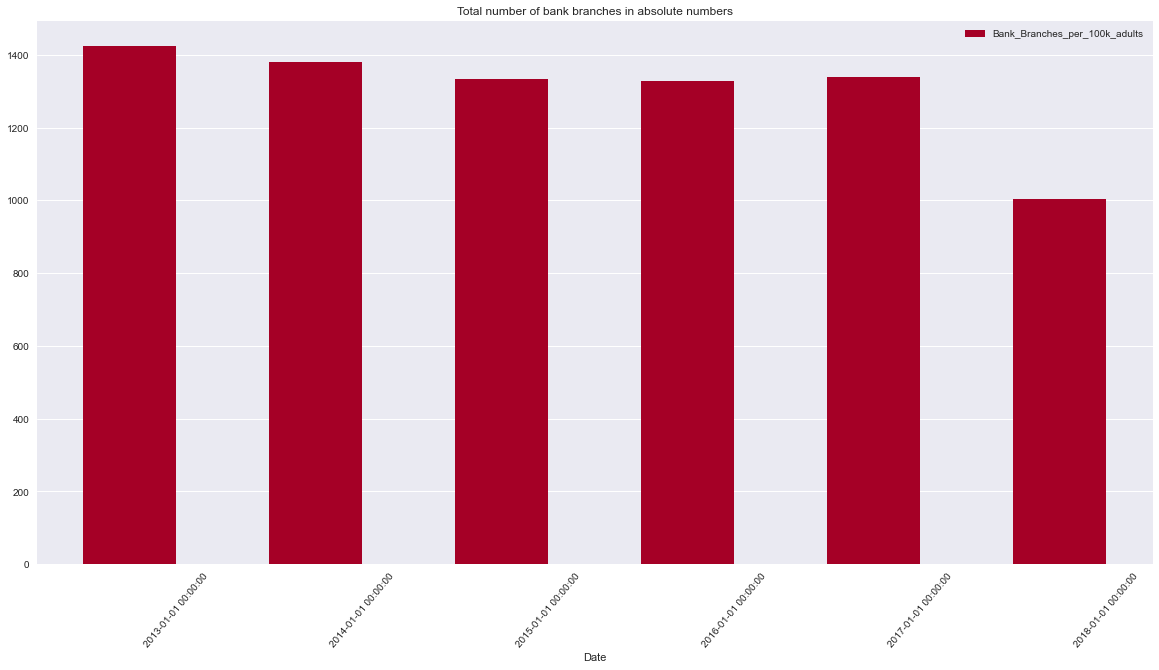

In [69]:
bank_branches_through_time=df_data2["Bank_Branches_per_100k_adults"].groupby(df_data2["Date"]).sum().to_frame()

fig = plt.figure()
ax = fig.add_subplot()
width = 0.50

bank_branches_through_time.plot.bar(figsize=(20,10),width = width,ax=ax,rot=0,position=1,color= plt.cm.RdYlGn(np.linspace(0,10,10)))
plt.xticks(rotation=50)
plt.title("Total number of bank branches in absolute numbers");
plt.grid( which='major', axis='x')
plt.show();

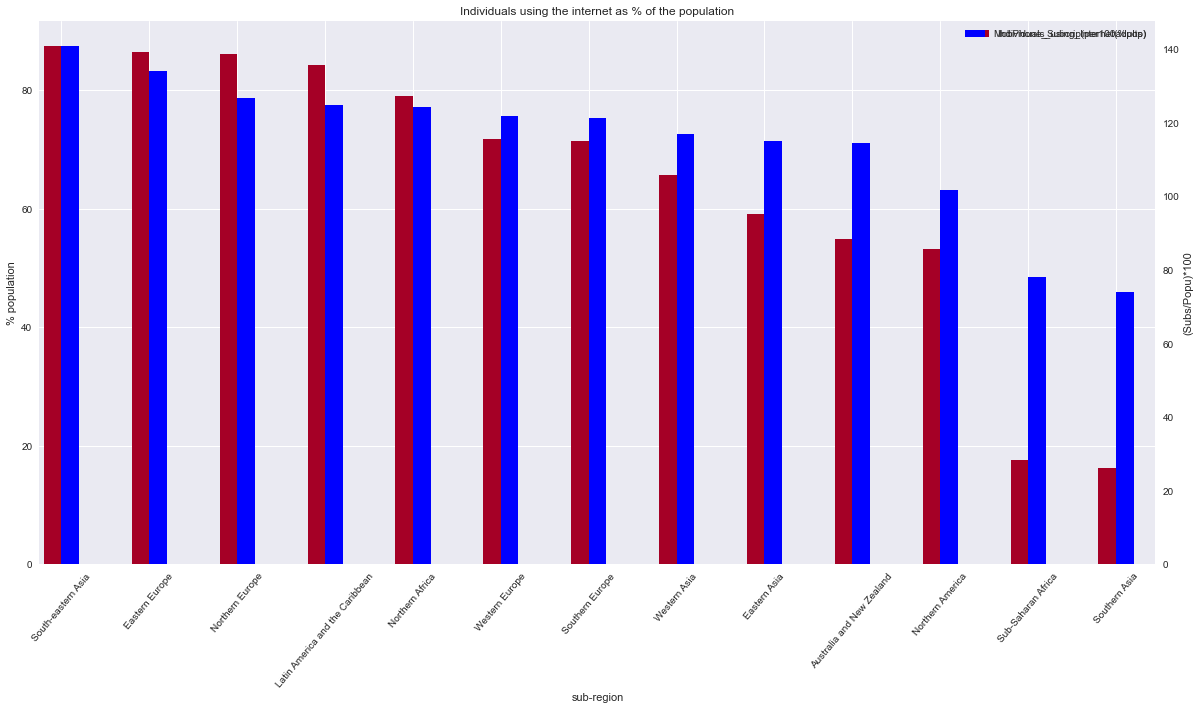

In [70]:
Ind_Internet=df_data2["Individuals_using_Internet(%pop)"].groupby(df_data2["sub-region"]).mean().to_frame()
mobile_phes=df_data2["MobPhone_Subcrip(per100adults)"].groupby(df_data2["sub-region"]).mean().to_frame()

Ind_Internet=Ind_Internet.nlargest(100, "Individuals_using_Internet(%pop)")
mobile_phes=mobile_phes.nlargest(100,"MobPhone_Subcrip(per100adults)")

fig = plt.figure()
ax = fig.add_subplot()
width = 0.20

Ind_Internet.plot.bar(figsize=(20,10),width = width,ax=ax,rot=0,position=1,color= plt.cm.RdYlGn(np.linspace(0,10,10)))
ax.set_ylabel('% population')

plt.xticks(rotation=50)

ax2 = ax.twinx()
mobile_phes.plot.bar(figsize=(20,10),width = width,ax=ax2,rot=0,position=0,color= 'blue')
ax2.set_ylabel("(Subs/Popu)*100")

plt.xticks(rotation=50)
plt.grid(None)
plt.title("Individuals using the internet as % of the population");
plt.show();

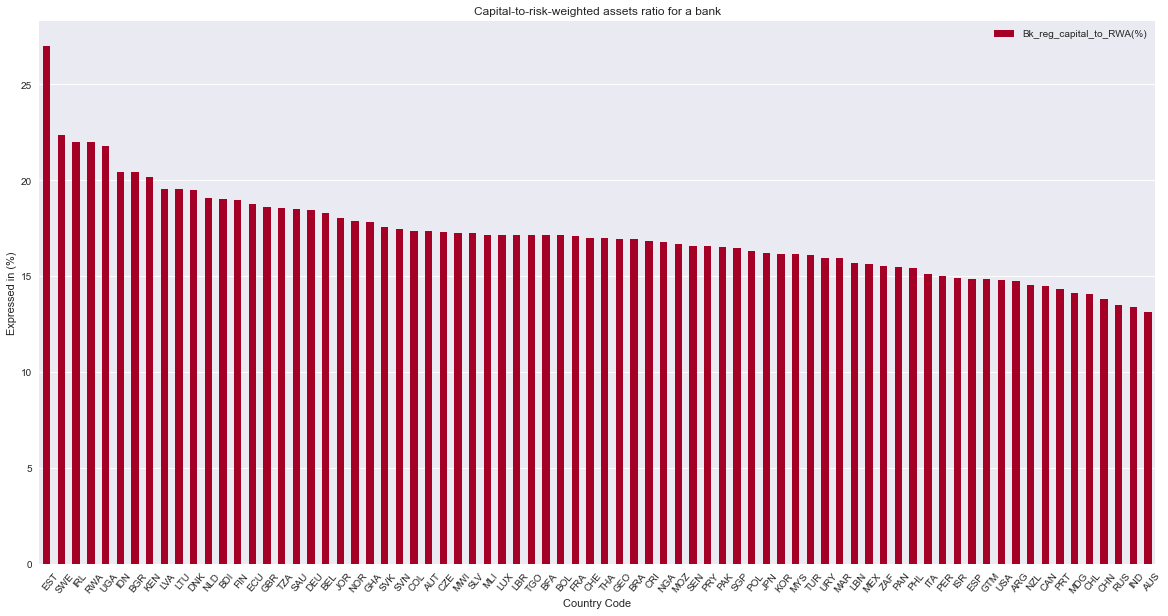

In [72]:
df_data2["Bk_reg_capital_to_RWA(%)"]=df_data2.groupby(by="Country Name")["Bk_reg_capital_to_RWA(%)"].transform(lambda x: x.fillna(x.mean()))
#Imputed based on the mean of the country over the period studied, assuming no major changes over the period of 6 years. In this 
#case the decision to impute over the country´s mean is based on the fact that despite on the same regions/sub-regions, 
#monetary policy sovereignty might not be shared or relegated over a Central Authority for countries in the same area, except for 
#the Eu for instance.

RWA=df_data2["Bk_reg_capital_to_RWA(%)"].groupby(df_data2["Country Code"]).mean().to_frame()
RWA=RWA.nlargest(100, "Bk_reg_capital_to_RWA(%)")

fig = plt.figure()
ax = fig.add_subplot()
width = 0.50

RWA.plot.bar(figsize=(20,10),width = width,ax=ax,rot=0,position=1,color= plt.cm.RdYlGn(np.linspace(0,10,10)))
ax.set_ylabel('Expressed in (%)')

plt.xticks(rotation=50)

plt.xticks(rotation=50)
plt.grid(axis="x")
plt.title("Capital-to-risk-weighted assets ratio for a bank");
plt.show();

## FEATURE ANALYSIS

In [51]:
#corr=df_data2.corr()
#plt.figure(figsize=(20,18))
#sns.heatmap(corr,annot=True,fmt='.2g',cmap="cividis")
#plt.show()
#Dataset is so big that it is not really informative, neither the correlation matrix itself, thus we need to select specific features

In [52]:
#def Corr_Analysis(dataset:pd.DataFrame, threshold:np.float32):
    #col_corr=set() #Determines an empty set of the data 
    #corr_matrix=dataset.corr() #Computes the correlation matrix of the input dataset of the function 
    #for i in range(len(corr_matrix.columns)):  #Loops over n rows of the correlation matrix
        #for j in range(i):                     #Goes over all the columns which match that specific instance
            #if abs(corr_matrix.iloc[i,j])>threshold: #If the number in that instance (in absolute value) is greater than the passed threshold
                #col_name=corr_matrix.columns[i]      #Gimme the column name which meets the previous criteria
                #col_corr.add(col_name)               #Append that column name to the empty set created
    #return col_corr

#Corr_Analysis(df_data2, 0.70) #Initially, this feature is highly correlated with click-bool

# Different Sub-sets of the Data to Feed the models with

In [362]:
df_data2.columns

Index(['Date', 'Country Name', 'Country Code', 'Income Leve', 'region',
       'sub-region', 'log_Fintech_credit', 'log_Total_Alternative_credit',
       'log_Bigtech_credit', 'Total_domestic_credit_by_financial_sector',
       'GDP/capita(USD $)', 'GDP/capita (USD $)^2', 'GDP growth (annual %)',
       'CPI(2010=100)', 'Bank_Branches_per_100k_adults',
       'Individuals_using_Internet(%pop)', 'Lerner Index',
       'Starting a business - Score', 'Score-Time(days)',
       'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)',
       'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)',
       'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)',
       'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)',
       'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)',
       'Stockstraded_totalvalue(%GDP)', 'MobPhone_Subcrip(per100adults)',
       'R&D_Expenditure(%GDP)', 'Financial Institutions Access Index',
       'Regulatory_Stringency_Index'],
 

In [372]:
df_data2["Date"].value_counts().idxmax()

Timestamp('2016-01-01 00:00:00')

### Winsorzing the data at the 1 and 99% level

In [578]:
winsorize(df_data2["Total_domestic_credit_by_financial_sector"],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['GDP/capita(USD $)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['GDP/capita (USD $)^2'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['GDP growth (annual %)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['CPI(2010=100)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Bank_Branches_per_100k_adults'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Individuals_using_Internet(%pop)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Lerner Index'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Starting a business - Score'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Score-Time(days)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Score-Paid-Min-Capital'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Score-Cost(%income/capita)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Enforcement_fees(%claim)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Enforcement_ judgement(days)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Cost_Enforc_contracts(%claim)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Bk_reg_capital_to_RWA(%)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Provisions_nonperf_loans(%)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Loans_from_nonresidbanks_toGDP(%)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Total_factoring_vol_to_GDP(%)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['GlobalLeasing_Vol_toGDP(%)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Stockstraded_totalvalue(%GDP)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['MobPhone_Subcrip(per100adults)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['R&D_Expenditure(%GDP)'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Financial Institutions Access Index'],limits=(0.01,0.01),inplace=True)
winsorize(df_data2['Regulatory_Stringency_Index'],limits=(0.01,0.01),inplace=True);

In [55]:
df_represent=df_data2.loc[:,"Income Leve":"Regulatory_Stringency_Index"]
df_represent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 425
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Income Leve                                410 non-null    object 
 1   region                                     410 non-null    object 
 2   sub-region                                 410 non-null    object 
 3   log_Fintech_credit                         410 non-null    float64
 4   log_Total_Alternative_credit               410 non-null    float64
 5   log_Bigtech_credit                         410 non-null    float64
 6   Total_domestic_credit_by_financial_sector  410 non-null    float64
 7   GDP/capita(USD $)                          410 non-null    float64
 8   GDP/capita (USD $)^2                       410 non-null    float64
 9   GDP growth (annual %)                      410 non-null    float64
 10  CPI(2010=100)             

In [56]:
df_represent["Total_domestic_credit_by_financial_sector"].value_counts()

1.00           6
20853792.00    5
1906613.00     1
17394266.00    1
641927.08      1
              ..
5445922.00     1
1991.00        1
4411061.00     1
2443910.00     1
4396589.00     1
Name: Total_domestic_credit_by_financial_sector, Length: 401, dtype: int64

In [579]:
df_represent.replace(1.0, value=1.338652e+06,inplace=True)

In [58]:
df_represent["Enforcement_ judgement(days)"].describe()

count    410.000000
mean     177.490001
std      110.441842
min       40.000000
25%       90.000000
50%      150.000000
75%      217.500000
max      540.000000
Name: Enforcement_ judgement(days), dtype: float64

In [580]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

cv=KFold(n_splits=5, random_state=0, shuffle=True)

### 1.) Log-Total Alternative Credit

In [473]:
X_T_1=df_data2.drop(columns=["log_Fintech_credit","log_Bigtech_credit","region","sub-region"])

X_T_1_nonan=X_T_1.dropna(axis=0, how="any")
X_T_1_nonan=pd.get_dummies(data=X_T_1_nonan,columns=["Income Leve"],prefix="dmmy",drop_first=True)
X_T_1_nonan["log_Total_Alternative_credit"]=abs(X_T_1_nonan["log_Total_Alternative_credit"])
X_T_1_nonan.shape

(410, 32)

### Scaling the Data

In [474]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled=scaler.fit_transform(X_T_1_nonan.drop(columns=["Date",'log_Total_Alternative_credit','Country Name','Country Code']))
#Creating a new DataFrame with the scaled data
scaled_df=pd.DataFrame(data=scaled,columns=X_T_1_nonan.drop(columns=["Date",'log_Total_Alternative_credit','Country Name','Country Code']).columns)

df_Ta1=X_T_1_nonan.copy()
df_Ta1[scaled_df.columns]=np.array(scaled_df)
#df_Ta1['Country']=list(df_Ta1["Country Name"])

#df_Ta1=df_Ta1.set_index(['Country Name','Date'])
#Obtained the absolute value since credit cant be negative
df_Ta1["log_Total_Alternative_credit"]=abs(df_Ta1["log_Total_Alternative_credit"])
df_Ta1=df_Ta1.set_index("Date")
df_Ta1.columns

Index(['Country Name', 'Country Code', 'log_Total_Alternative_credit',
       'Total_domestic_credit_by_financial_sector', 'GDP/capita(USD $)',
       'GDP/capita (USD $)^2', 'GDP growth (annual %)', 'CPI(2010=100)',
       'Bank_Branches_per_100k_adults', 'Individuals_using_Internet(%pop)',
       'Lerner Index', 'Starting a business - Score', 'Score-Time(days)',
       'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)',
       'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)',
       'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)',
       'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)',
       'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)',
       'Stockstraded_totalvalue(%GDP)', 'MobPhone_Subcrip(per100adults)',
       'R&D_Expenditure(%GDP)', 'Financial Institutions Access Index',
       'Regulatory_Stringency_Index', 'dmmy_Low income',
       'dmmy_Lower middle income', 'dmmy_Upper middle income'],
      dtype='object')

## Train-Test Splitting

In [475]:
X_1=df_Ta1.drop(columns=["Country Code","Country Code","Country Name","log_Total_Alternative_credit"])
Y_1=df_Ta1["log_Total_Alternative_credit"]

In [476]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_1, Y_1, test_size=.3, random_state=1)

### Model Deployment- XGBoostRegressor

In [229]:
import xgboost as xgb 
from xgboost import XGBRegressor


XGBreg=XGBRegressor(verbosity=0, use_rmm=True,random_state=42)
param_grid={"base_score":[int(x) for x in np.linspace(0.0,30.0)],
    "booster": ("gbtree","gblinear","dart"),
    "max_depth":[int(x) for x in np.linspace(2,30,1)],#How much depth the tree is allowed to grow. When you increase the max depth the model tends to overfit. Its usually employed as a regularization parameter
    "subsample":np.linspace(0,1,10,dtype=float)[1:].round(3), #How much % of data are you taking for each of the tree building. As we increase the subsample it overfitts
    "colsample_bylevel":np.linspace(0,1,10,dtype=float)[1:].round(3), #For every level it only considers a given % of features for each level. Also regularzation effect is you reduced it
    "colsample_bytree":np.linspace(0,1,10,dtype=float)[1:].round(3),
    "min_child_weight":[int(x) for x in np.linspace(1,100,1)], #If you increase it, it actually regularizes it
    "reg_lambda":np.linspace(0,1,11,dtype=float)[1:].round(3),
    "reg_alpha":np.linspace(0,1,11,dtype=float)[1:].round(3),
    "n_estimators": [int(x) for x in np.linspace(2,200,1)], #number of trees. Gradient boosting builds estimators serially. Each estimator or trees is actually boosting the next one.As we increase the estimators, the speed comes down. Better keeping it low
    "learning_rate":np.linspace(0.01,1,10,dtype=float)[1:].round(3) #If you increase it the algorithm learns faster, but it actually does not give you proper results. keeping the l rate small is good,
                                                                    #but if its too small it takes ages to compute.
}

In [230]:
#RANDOMIZED SEARCH FOR HYPER-PARAMETER TUNNING

random_search=RandomizedSearchCV(XGBreg,param_distributions=param_grid,n_iter=10000,
                                 scoring=("neg_root_mean_squared_error"),
                                 n_jobs=-1,cv=cv,verbose=3)
random_search.fit(X_train,Y_train);

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


In [231]:
random_search.best_estimator_ 

XGBRegressor(base_score=17, booster='gbtree', colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=0.556, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1.0, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0.9, reg_lambda=0.8, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', use_rmm=True, validate_parameters=1,
             verbosity=0)

In [506]:
XGB_regressor=xgb.XGBRegressor(base_score=14, booster='gbtree', colsample_bylevel=0.778,
             colsample_bynode=1, colsample_bytree=0.778, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.89, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=2, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0.1, reg_lambda=0.2, scale_pos_weight=1, subsample=0.889,
             tree_method='exact', use_rmm=True, validate_parameters=1,
             verbosity=0)

In [507]:
XGB_model=XGB_regressor
XGB_model.fit(X_train,Y_train)
y_pred=XGB_model.predict(X_test)
y_train_pred=XGB_model.predict(X_train)


print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred)));

print("#########################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred));

Training accuracy mean_squared_error: 1.5992976885140442
Testing accuracy mean_squared_error: 1.7750887068809322
#########################################
Training accuracy r2_score: 0.608393372099251
Testing accuracy r2_score: 0.5664860456604439


C:\Users\Pedro Romero\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### Trying to improve model´s accuracy with features´ selection 

In [517]:
#Sequential Forward Feature Selection

sffs1=SFS(estimator=XGB_model,
          k_features=28,
          forward=True,
          floating=False,
          scoring="neg_root_mean_squared_error",
          cv=cv,
          n_jobs=-1)

sffs1.fit(X_train,Y_train)

print('\nSequential Forward Selection (k=27). Index:')
print(sffs1.k_feature_idx_)
print("\nSequential Forward Feature Selection. Names:")
print(sffs1.k_feature_names_)
print('CV Score:')
print(sffs1.k_score_)


Sequential Forward Selection (k=27). Index:
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27)

Sequential Forward Feature Selection. Names:
('Total_domestic_credit_by_financial_sector', 'GDP/capita(USD $)', 'GDP/capita (USD $)^2', 'GDP growth (annual %)', 'CPI(2010=100)', 'Bank_Branches_per_100k_adults', 'Individuals_using_Internet(%pop)', 'Lerner Index', 'Starting a business - Score', 'Score-Time(days)', 'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)', 'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)', 'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)', 'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)', 'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)', 'Stockstraded_totalvalue(%GDP)', 'MobPhone_Subcrip(per100adults)', 'R&D_Expenditure(%GDP)', 'Financial Institutions Access Index', 'Regulatory_Stringency_Index', 'dmmy_Low income', 'dmmy_Lower middle income', 'dmmy_Upper middle i

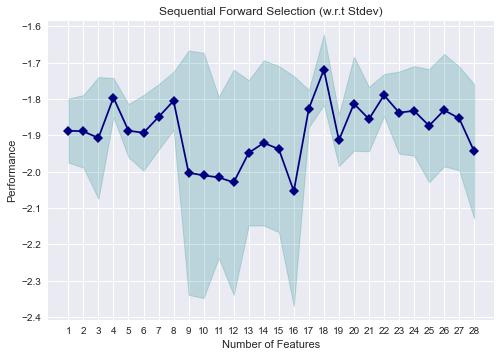

<Figure size 576x396 with 0 Axes>

In [102]:
fig= plot_sfs(sffs1.get_metric_dict(),
              kind="std_dev",
             color="navy",
             bcolor="teal",
             marker='D',
             confidence_interval=0.99)

plt.title("Sequential Forward Selection (w.r.t Stdev)")
plt.grid(True)
plt.show()
plt.savefig("SSF_XGB_TOTAL.png")

In [518]:
sffs1.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([-1.86084769, -1.8696625 , -2.05249675, -1.76202027, -1.91156106]),
  'avg_score': -1.89131765475813,
  'feature_names': ('Total_domestic_credit_by_financial_sector',)},
 2: {'feature_idx': (0, 12),
  'cv_scores': array([-1.7974423 , -1.93654059, -2.05249675, -1.76202027, -1.91156106]),
  'avg_score': -1.8920121951076356,
  'feature_names': ('Total_domestic_credit_by_financial_sector',
   'Enforcement_fees(%claim)')},
 3: {'feature_idx': (0, 2, 12),
  'cv_scores': array([-1.73761068, -2.15273114, -1.78325032, -1.80172521, -2.06865792]),
  'avg_score': -1.9087950527788677,
  'feature_names': ('Total_domestic_credit_by_financial_sector',
   'GDP/capita (USD $)^2',
   'Enforcement_fees(%claim)')},
 4: {'feature_idx': (0, 2, 12, 20),
  'cv_scores': array([-1.79264359, -1.89595071, -1.76152421, -1.75987963, -1.80458105]),
  'avg_score': -1.8029158397630822,
  'feature_names': ('Total_domestic_credit_by_financial_sector',
   'GDP/capita (USD $)^

## Employing the selected features

In [530]:
selected={'Total_domestic_credit_by_financial_sector',
   'GDP/capita(USD $)',
   'GDP/capita (USD $)^2',
   'GDP growth (annual %)',
   'CPI(2010=100)',
   'Individuals_using_Internet(%pop)',
   'Score-Paid-Min-Capital',
   'Score-Cost(%income/capita)',
   'Enforcement_fees(%claim)',
   'Enforcement_ judgement(days)',
   'Cost_Enforc_contracts(%claim)',
   'Bk_reg_capital_to_RWA(%)',
   'Provisions_nonperf_loans(%)',
   'Total_factoring_vol_to_GDP(%)',
   'Stockstraded_totalvalue(%GDP)',
   'R&D_Expenditure(%GDP)',
   'Regulatory_Stringency_Index'}
X_train_sffs1=X_train.loc[:,selected]
X_test_sffs1=X_test.loc[:,selected]

XGB_model.fit(X_train_sffs1,Y_train)
y_pred=XGB_model.predict(X_test_sffs1)
y_train_pred=XGB_model.predict(X_train_sffs1)

print("AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS")
print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred)));

print("#########################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred));


AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS
Training accuracy mean_squared_error: 1.6302040521824313
Testing accuracy mean_squared_error: 1.6861470990133658
#########################################
Training accuracy r2_score: 0.5931115602618289
Testing accuracy r2_score: 0.6088405031672524


C:\Users\Pedro Romero\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [535]:

f = "gain"
XGB_model.get_booster().get_score(importance_type= "gain")

{'Total_domestic_credit_by_financial_sector': 394.109375,
 'Bk_reg_capital_to_RWA(%)': 25.9504089,
 'Individuals_using_Internet(%pop)': 64.1842346,
 'Enforcement_fees(%claim)': 25.4804993,
 'Score-Paid-Min-Capital': 76.1075058}

NameError: name 'plot' is not defined

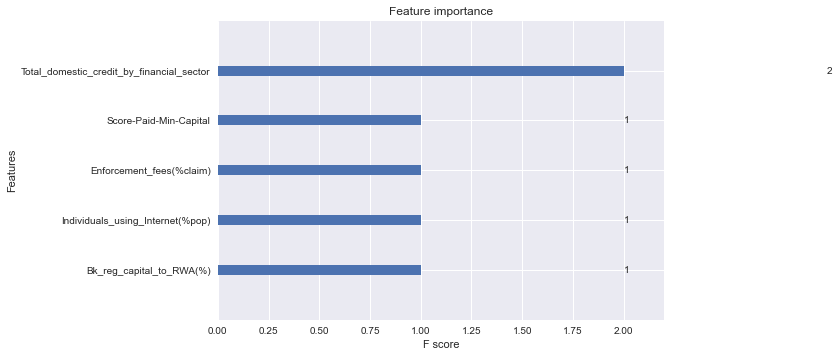

In [531]:
plot_importance(XGB_model)

<Figure size 4320x1080 with 0 Axes>

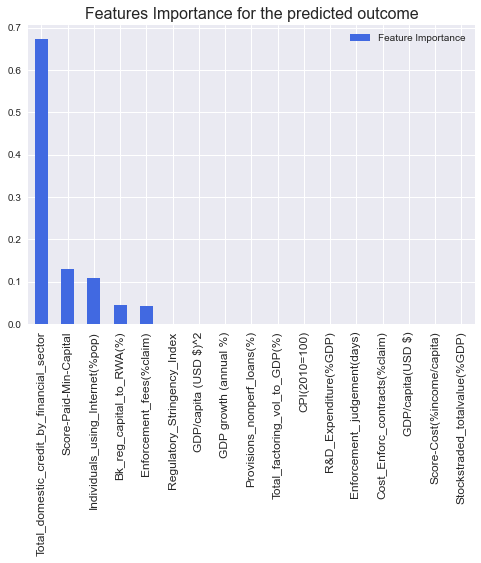

In [532]:
df_features_importance=pd.DataFrame(XGB_model.feature_importances_, index=selected,
                                   columns=["Feature Importance"]).sort_values("Feature Importance",ascending=False)
plt.figure(figsize=(60,15))
df_features_importance.plot(kind='bar',color="royalblue")
plt.grid(True)
plt.xticks(fontsize=12, rotation=90)
plt.title("Features Importance for the predicted outcome",fontsize=16)
plt.yticks(fontsize=10)
plt.savefig("Features Importances.png");

## Residuals´ Plotting

In [132]:
import scipy.stats as stats

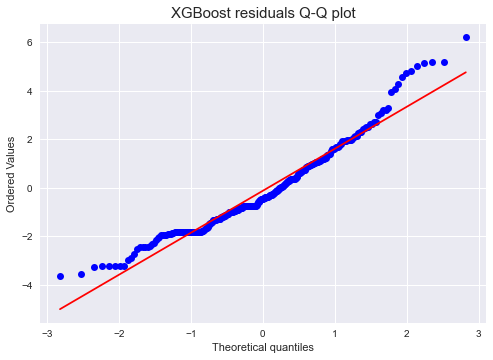

In [307]:
residuals_XGBoost_Tot=np.array(Y_train-y_train_pred)

stats.probplot(residuals_XGBoost_Tot, dist="norm", plot=plt)
plt.title("XGBoost residuals Q-Q plot",fontsize=15)
plt.show()
#plt.savefig("QQ_plot_XB_Tot")

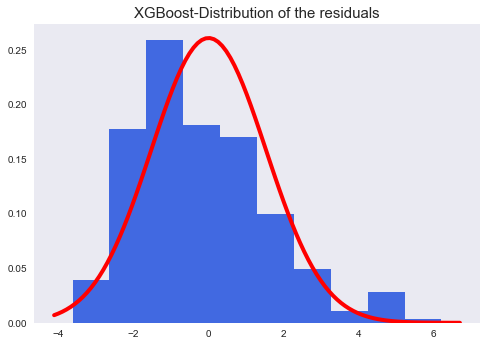

<Figure size 576x396 with 0 Axes>

In [308]:
from scipy.stats import norm

mu, std=norm.fit(residuals_Lin_Tot)
plt.hist(residuals_XGBoost_Tot,color="royalblue",bins=10,density=True,alpha=1)

xmin,xmax=plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x,p,"r",linewidth=4)
plt.title("XGBoost-Distribution of the residuals",fontsize=15)
plt.grid(False)
plt.show()
plt.savefig("XGBHist_residuals.png")

## Plotting of predictions

In [217]:
y_pred=pd.Series(y_pred)

pa=pd.DataFrame()
pa["Date"]=X_test.index()
pa["Prediction"]=y_pred[0:]
pa["Actual Value"]=Y_test.values[0:-1]
pa.head(2)

TypeError: 'DatetimeIndex' object is not callable

<ipython-input-286-ef6e5ff49b2a>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


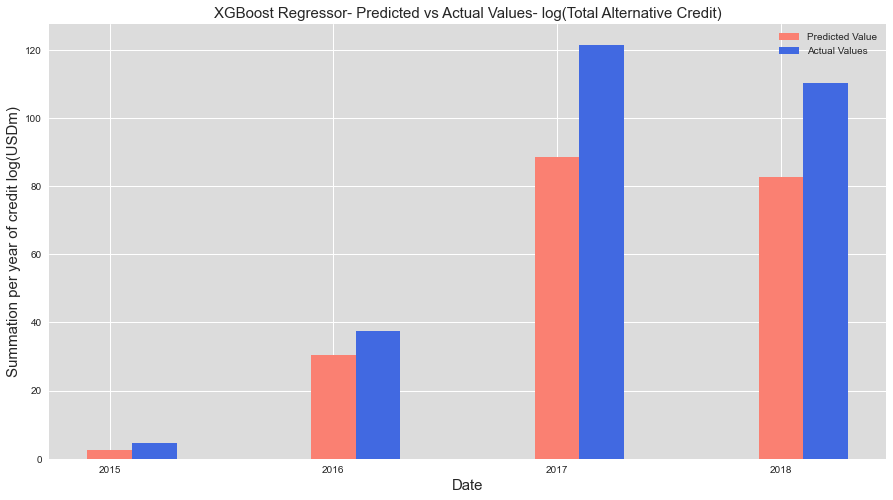

In [286]:
prediction=pa.groupby("Date")['Prediction'].sum()
actual=pa.groupby("Date")['Actual Value'].sum()
x=[2015,2016, 2017, 2018]
w=0.2

bar1=np.arange(len(x))
bar2= [i+w for i in bar1]

plt.figure(figsize=(15,8))

plt.bar(bar1,prediction,w, label="Predicted Value",color="salmon")
plt.bar(bar2,actual, w, label="Actual Values",color="royalblue")


plt.xticks(bar1, x,size=10)
plt.yticks(size=10)

plt.ylabel('Summation per year of credit log(USDm)',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.title('XGBoost Regressor- Predicted vs Actual Values- log(Total Alternative Credit)',fontsize=15)
plt.grid(True)
ax=plt.axes()
ax.set_facecolor("gainsboro")
plt.legend()

### Model Deployment- Linear Regression 

In [135]:
from sklearn.linear_model import LinearRegression

from sklearn import linear_model

lin_reg = linear_model.LinearRegression()

param_grid={"fit_intercept": (True, False), 
            "normalize":(True,False) }

random_search=RandomizedSearchCV(lin_reg,param_distributions=param_grid,n_iter=10000,
                                 scoring=("neg_root_mean_squared_error"),
                                 n_jobs=-1,cv=cv,verbose=3)
random_search.fit(X_test,Y_test)

C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10000. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LinearRegression(), n_iter=10000, n_jobs=-1,
                   param_distributions={'fit_intercept': (True, False),
                                        'normalize': (True, False)},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [136]:
random_search.best_estimator_

LinearRegression(normalize=True)

In [488]:
lin_regressor1=LinearRegression(normalize=True)

lin_regressor1.fit(X_train,Y_train)
y_pred_lin=lin_regressor.predict(X_test)
y_train_pred_lin=lin_regressor.predict(X_train)


print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred_lin)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred_lin)));
print("#######################################",
      "##################################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred_lin));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred_lin));

Training accuracy mean_squared_error: 1.519400084967252
Testing accuracy mean_squared_error: 1.7597460748778473
####################################### ##################################################
Training accuracy r2_score: 0.6465437160665966
Testing accuracy r2_score: 0.5739476453834619


## Improving the results 

In [499]:
#Sequential Forward Feature Selection
sffs3=SFS(estimator=lin_regressor1,
          k_features=24,
          forward=True,
          floating=True,
          scoring="neg_root_mean_squared_error",
          cv=cv,
          n_jobs=-1)

sffs3.fit(X_train,Y_train)

print('\nSequential Forward Selection (k=27). Index:')
print(sffs3.k_feature_idx_)
print("\nSequential Forward Feature Selection. Names:")
print(sffs3.k_feature_names_)
print('CV Score:')
print(sffs3.k_score_)


Sequential Forward Selection (k=27). Index:
(0, 1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27)

Sequential Forward Feature Selection. Names:
('Total_domestic_credit_by_financial_sector', 'GDP/capita(USD $)', 'GDP/capita (USD $)^2', 'GDP growth (annual %)', 'CPI(2010=100)', 'Bank_Branches_per_100k_adults', 'Individuals_using_Internet(%pop)', 'Score-Time(days)', 'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)', 'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)', 'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)', 'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)', 'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)', 'MobPhone_Subcrip(per100adults)', 'R&D_Expenditure(%GDP)', 'Regulatory_Stringency_Index', 'dmmy_Low income', 'dmmy_Lower middle income', 'dmmy_Upper middle income')
CV Score:
-1.6609520019180493


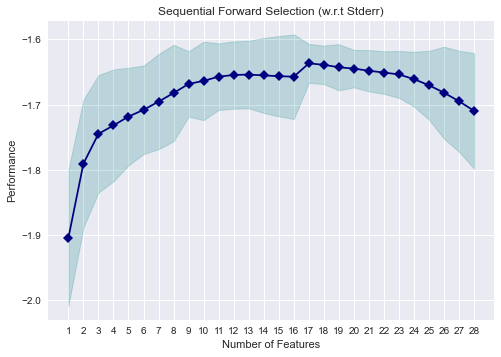

<Figure size 576x396 with 0 Axes>

In [167]:
fig= plot_sfs(sffs3.get_metric_dict(),
             kind="std_dev",
             color="navy",
             bcolor="teal",
             marker='D',)
plt.title("Sequential Forward Selection (w.r.t Stderr)")
plt.grid(True)
plt.show()
plt.savefig("SFF_LIN_TOTAL.png")

In [496]:
sffs3.subsets_

{1: {'feature_idx': (0,),
  'cv_scores': array([-1.75226257, -1.98673849, -1.80599511, -2.00645654, -1.97343421]),
  'avg_score': -1.9049773844603064,
  'feature_names': ('Total_domestic_credit_by_financial_sector',)},
 2: {'feature_idx': (0, 6),
  'cv_scores': array([-1.6338402 , -1.88718657, -1.73101033, -1.80946339, -1.89224087]),
  'avg_score': -1.7907482704247477,
  'feature_names': ('Total_domestic_credit_by_financial_sector',
   'Individuals_using_Internet(%pop)')},
 3: {'feature_idx': (0, 4, 6),
  'cv_scores': array([-1.67977945, -1.8253611 , -1.61999467, -1.73532267, -1.86416652]),
  'avg_score': -1.744924881230578,
  'feature_names': ('Total_domestic_credit_by_financial_sector',
   'CPI(2010=100)',
   'Individuals_using_Internet(%pop)')},
 4: {'feature_idx': (0, 4, 6, 9),
  'cv_scores': array([-1.72155638, -1.79772052, -1.60078959, -1.6912954 , -1.84873628]),
  'avg_score': -1.732019633791958,
  'feature_names': ('Total_domestic_credit_by_financial_sector',
   'CPI(2010=100)'

In [503]:
selected={'Total_domestic_credit_by_financial_sector',
   'GDP/capita(USD $)',
   'GDP/capita (USD $)^2',
   'GDP growth (annual %)',
   'CPI(2010=100)',
   'Individuals_using_Internet(%pop)',
   'Score-Time(days)',
   'Score-Paid-Min-Capital',
   'Score-Cost(%income/capita)',
   'Enforcement_fees(%claim)',
   'Enforcement_ judgement(days)',
   'Cost_Enforc_contracts(%claim)',
   'GlobalLeasing_Vol_toGDP(%)',
   'Regulatory_Stringency_Index',
   'dmmy_Low income',
   'dmmy_Lower middle income',
   'dmmy_Upper middle income'}
X_train_sffs3=X_train.loc[:,selected]
X_test_sffs3=X_test.loc[:,selected]

lin_regressor1.fit(X_train_sffs3,Y_train)
y_pred_LIN_1=lin_regressor1.predict(X_test_sffs3)
y_train_pred_LIN_1=lin_regressor1.predict(X_train_sffs3)


print("AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS")
print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred_LIN_1)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred_LIN_1)));

print("#########################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred_LIN_1));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred_LIN_1));

AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS
Training accuracy mean_squared_error: 1.540230314831624
Testing accuracy mean_squared_error: 1.7413972525159414
#########################################
Training accuracy r2_score: 0.636785859179594
Testing accuracy r2_score: 0.5827861958425617


## Features´ contributions 

In [504]:
columns={'Total_domestic_credit_by_financial_sector',
   'GDP/capita(USD $)',
   'GDP/capita (USD $)^2',
   'GDP growth (annual %)',
   'CPI(2010=100)',
   'Individuals_using_Internet(%pop)',
   'Score-Time(days)',
   'Score-Paid-Min-Capital',
   'Score-Cost(%income/capita)',
   'Enforcement_fees(%claim)',
   'Enforcement_ judgement(days)',
   'Cost_Enforc_contracts(%claim)',
   'GlobalLeasing_Vol_toGDP(%)',
   'Regulatory_Stringency_Index',
   'dmmy_Low income',
   'dmmy_Lower middle income',
   'dmmy_Upper middle income'}

<Figure size 4320x1080 with 0 Axes>

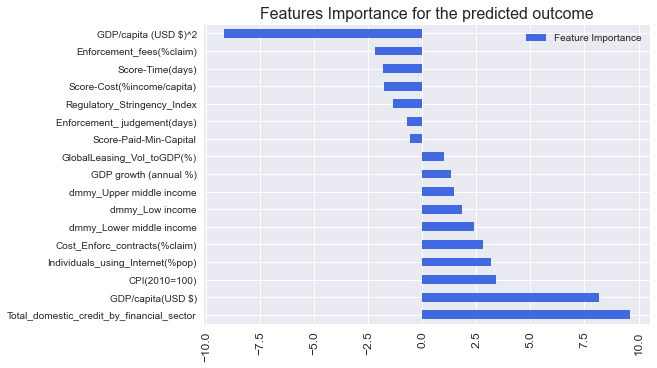

In [536]:
df_features_importance=pd.DataFrame(lin_regressor1.coef_, index=columns,
                                   columns=["Feature Importance"]).sort_values("Feature Importance",ascending=False)
plt.figure(figsize=(60,15))
df_features_importance.plot(kind='barh',color="royalblue")
plt.grid(True)
plt.xticks(fontsize=12, rotation=90)
plt.title("Features Importance for the predicted outcome",fontsize=16)
plt.yticks(fontsize=10)
plt.savefig("Features Importances.png");

## Plotting of the residuals

In [304]:
residuals_Lin_Tot=np.array(Y_train-y_train_pred_LIN_1)

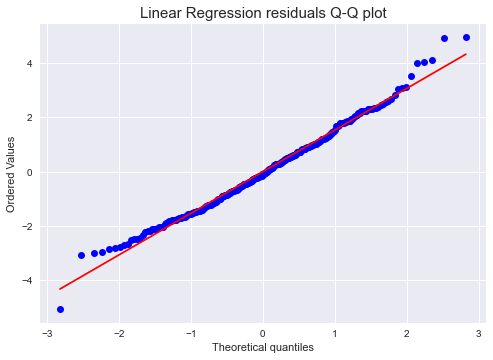

In [305]:
stats.probplot(residuals_Lin_Tot, dist="norm", plot=plt)
plt.title("Linear Regression residuals Q-Q plot",fontsize=15)

#plt.savefig("QQ_plot_Lin_Tot.png")
plt.show()

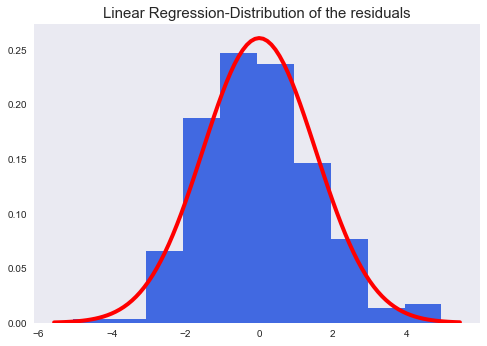

In [306]:
from scipy.stats import norm

mu, std=norm.fit(residuals_Lin_Tot)
plt.hist(residuals_Lin_Tot,color="royalblue",bins=10,density=True,alpha=1)

xmin,xmax=plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x,p,"r",linewidth=4)
plt.title("Linear Regression-Distribution of the residuals",fontsize=15)
plt.grid(False)
plt.savefig("Lin_Hist_residuals")
plt.show()


## Ploting of the results

In [126]:
y_pred_lin=y_pred_LIN_1.ravel()
y_pred=pd.Series(y_pred_lin)

pa=pd.DataFrame()
pa["Date"]=X_test.reset_index().Date.iloc[0:-1]
pa["Prediction"]=y_pred_lin[1:]
pa["Actual Value"]=Y_test["log_Total_Alternative_credit"].values[0:-1]
pa.head(2)

,Date,Prediction,Actual Value
0,2017-01-01,8.890530,8.882654
1,2018-01-01,1.296408,9.149103


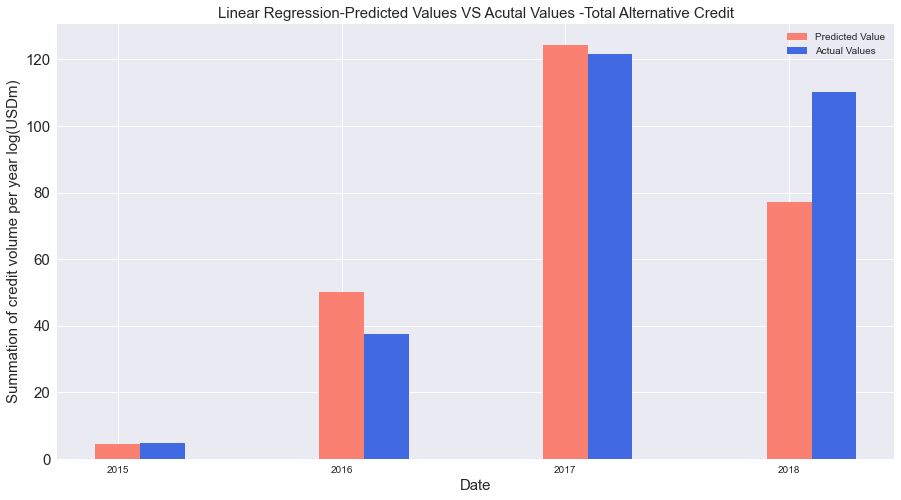

In [128]:
prediction=pa.groupby("Date")['Prediction'].sum()
actual=pa.groupby("Date")['Actual Value'].sum()
x=[2015,2016, 2017, 2018]
w=0.2

bar1=np.arange(len(x))
bar2= [i+w for i in bar1]

plt.figure(figsize=(15,8))

plt.bar(bar1,prediction,w, label="Predicted Value",color="salmon")
plt.bar(bar2,actual, w, label="Actual Values",color="royalblue")


plt.xticks(bar1, x)
plt.yticks(size=15)

plt.ylabel('Summation of credit volume per year log(USDm)',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.title('Linear Regression-Predicted Values VS Acutal Values -Total Alternative Credit',fontsize=15)
plt.legend()

In [129]:
df_data2.columns

Index(['Date', 'Country Name', 'Country Code', 'Income Leve', 'region',
       'sub-region', 'log_Fintech_credit', 'log_Total_Alternative_credit',
       'log_Bigtech_credit', 'Total_domestic_credit_by_financial_sector',
       'GDP/capita(USD $)', 'GDP/capita (USD $)^2', 'GDP growth (annual %)',
       'CPI(2010=100)', 'Bank_Branches_per_100k_adults',
       'Individuals_using_Internet(%pop)', 'Lerner Index',
       'Starting a business - Score', 'Score-Time(days)',
       'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)',
       'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)',
       'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)',
       'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)',
       'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)',
       'Stockstraded_totalvalue(%GDP)', 'MobPhone_Subcrip(per100adults)',
       'R&D_Expenditure(%GDP)', 'Financial Institutions Access Index',
       'Regulatory_Stringency_Index'],
 

# 2.) Log BigTech

In [581]:
X_T_2=df_data2.drop(columns=["log_Fintech_credit",'log_Total_Alternative_credit',"region","sub-region"])

X_T_2_nonan=X_T_2.dropna(axis=0, how="any")
X_T_2_nonan=pd.get_dummies(data=X_T_2_nonan,columns=["Income Leve"],prefix="dmmy",drop_first=True)
X_T_2_nonan['log_Bigtech_credit']=abs(X_T_2_nonan['log_Bigtech_credit'])
X_T_2_nonan.shape

(410, 32)

## Scaling the Data

In [582]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled=scaler.fit_transform(X_T_2_nonan.drop(columns=["Date",'log_Bigtech_credit','Country Name','Country Code']))
#Creating a new DataFrame with the scaled data
scaled_df=pd.DataFrame(data=scaled,columns=X_T_2_nonan.drop(columns=["Date",'log_Bigtech_credit','Country Name','Country Code']).columns)

df_Ta2=X_T_2_nonan.copy()
df_Ta2[scaled_df.columns]=np.array(scaled_df)
#df_Ta2['Country']=list(df_Ta2["Country Name"])

df_Ta2=df_Ta2.set_index(['Country Name','Date'])


In [583]:
X_2=df_Ta2.drop(columns=["Country Code","log_Bigtech_credit"])
Y_2=df_Ta2["log_Bigtech_credit"]

X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size=.3, random_state=1)

In [584]:
print("Checking the length of the features´ training sample:", X_train.shape)
print("Checking the length of the targets´ training sample:", Y_train.shape)

Checking the length of the features´ training sample: (287, 28)
Checking the length of the targets´ training sample: (287,)


## ######XGBoost Regressor########

In [378]:
XGBreg=XGBRegressor(verbosity=0, use_rmm=True,random_state=42)

param_grid={"base_score":[int(x) for x in np.linspace(0.0,30.0)],
    "booster": ("gbtree","gblinear","dart"),
    "max_depth":[int(x) for x in np.linspace(2,30,1)],#How much depth the tree is allowed to grow. When you increase the max depth the model tends to overfit. Its usually employed as a regularization parameter
    "subsample":np.linspace(0,1,10,dtype=float)[1:].round(3), #How much % of data are you taking for each of the tree building. As we increase the subsample it overfitts
    "colsample_bylevel":np.linspace(0,1,10,dtype=float)[1:].round(3), #For every level it only considers a given % of features for each level. Also regularzation effect is you reduced it
    "colsample_bytree":np.linspace(0,1,10,dtype=float)[1:].round(3),
    "min_child_weight":[int(x) for x in np.linspace(1,100,1)], #If you increase it, it actually regularizes it
    "reg_lambda":np.linspace(0,1,11,dtype=float)[1:].round(3),
    "reg_alpha":np.linspace(0,1,11,dtype=float)[1:].round(3),
    "n_estimators": [int(x) for x in np.linspace(2,200,1)], #number of trees. Gradient boosting builds estimators serially. Each estimator or trees is actually boosting the next one.As we increase the estimators, the speed comes down. Better keeping it low
    "learning_rate":np.linspace(0.01,1,10,dtype=float)[1:].round(3) #If you increase it the algorithm learns faster, but it actually does not give you proper results. keeping the l rate small is good,
                                                                    #but if its too small it takes ages to compute.
}

#RANDOMIZED SEARCH FOR HYPER-PARAMETER TUNNING

random_search=RandomizedSearchCV(XGBreg,param_distributions=param_grid,n_iter=1000,
                                 scoring=("neg_root_mean_squared_error"),
                                 n_jobs=-1,cv=cv,verbose=3)
random_search.fit(X_test,Y_test);

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [379]:
random_search.best_estimator_

XGBRegressor(base_score=4, booster='gbtree', colsample_bylevel=0.222,
             colsample_bynode=1, colsample_bytree=0.222, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.78, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0.3, reg_lambda=0.1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', use_rmm=True, validate_parameters=1,
             verbosity=0)

In [380]:
XGB_regressor_1=xgb.XGBRegressor(base_score=50, booster='gbtree', colsample_bylevel=0.889,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.89, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=2, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0.9, reg_lambda=0.3, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', use_rmm=True, validate_parameters=1,
             verbosity=0)

In [394]:
XGB_model_1=XGBRegressor(base_score=8, booster='dart', colsample_bylevel=0.889,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.89, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=2, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0.9, reg_lambda=0.3, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', use_rmm=True, validate_parameters=1,
             verbosity=0)
XGB_model_1.fit(X_train,Y_train)
y_pred=XGB_model_1.predict(X_test)
y_train_pred=XGB_model_1.predict(X_train)


print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred)));

print("#########################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred));

Training accuracy mean_squared_error: 1.3036621355531197
Testing accuracy mean_squared_error: 1.7658203921431415
#########################################
Training accuracy r2_score: 0.647004276858365
Testing accuracy r2_score: 0.3814051763741221


C:\Users\Pedro Romero\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


## Forward Feature Selection

In [470]:
sffs4=SFS(estimator=XGB_model_1,
          k_features=28,
          forward=True,
          floating=True,
          scoring="neg_root_mean_squared_error",
          cv=cv,
          n_jobs=-1)

sffs4.fit(X_train,Y_train)

print('\nSequential Forward Selection (k=27). Index:')
print(sffs4.k_feature_idx_)
print("\nSequential Forward Feature Selection. Names:")
print(sffs4.k_feature_names_)
print('CV Score:')
print(sffs4.k_score_)


Sequential Forward Selection (k=27). Index:
(0, 1, 2, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17, 18, 23, 24)

Sequential Forward Feature Selection. Names:
('Total_domestic_credit_by_financial_sector', 'GDP/capita(USD $)', 'GDP/capita (USD $)^2', 'Individuals_using_Internet(%pop)', 'Lerner Index', 'Starting a business - Score', 'Score-Time(days)', 'Score-Cost(%income/capita)', 'Enforcement_fees(%claim)', 'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)', 'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)', 'Total_factoring_vol_to_GDP(%)', 'Financial Institutions Access Index', 'Regulatory_Stringency_Index')
CV Score:
-1.5806324237831768


In [607]:
sffs3.subsets_;

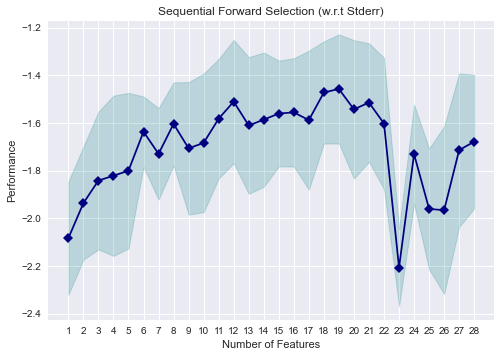

In [142]:
fig= plot_sfs(sffs4.get_metric_dict(),
             kind="std_err",
             color="navy",
             bcolor="teal",
             marker='D',)
plt.title("Sequential Forward Selection (w.r.t Stderr)")
plt.grid(True)
plt.show()

In [605]:
X_train_sffs4=X_train.loc[:,selected_fets]
X_test_sffs4=X_test.loc[:,selected_fets]

XGB_model_1.fit(X_train_sffs4,Y_train)
y_pred_XGB_2=XGB_model_1.predict(X_test_sffs4)
y_train_pred_XGB_2=XGB_model_1.predict(X_train_sffs4)


print("AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS")
print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred_XGB_2)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred_XGB_2)));

print("#########################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred_XGB_2));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred_XGB_2));

AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS
Training accuracy mean_squared_error: 1.3118526221355735
Testing accuracy mean_squared_error: 1.710598185525802
#########################################
Training accuracy r2_score: 0.6425548280137829
Testing accuracy r2_score: 0.419490622260417


C:\Users\Pedro Romero\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [604]:
selected_fets={'Total_domestic_credit_by_financial_sector',
   'GDP/capita (USD $)^2',
   'GDP growth (annual %)',
   'CPI(2010=100)',
   'Individuals_using_Internet(%pop)',
   'Score-Time(days)',
   'Score-Paid-Min-Capital',
   'Score-Cost(%income/capita)',
   'Enforcement_fees(%claim)',
   'Enforcement_ judgement(days)',
   'Cost_Enforc_contracts(%claim)',
   'Bk_reg_capital_to_RWA(%)',
   'MobPhone_Subcrip(per100adults)',
   'R&D_Expenditure(%GDP)',
   'Regulatory_Stringency_Index',
   'dmmy_Low income'}


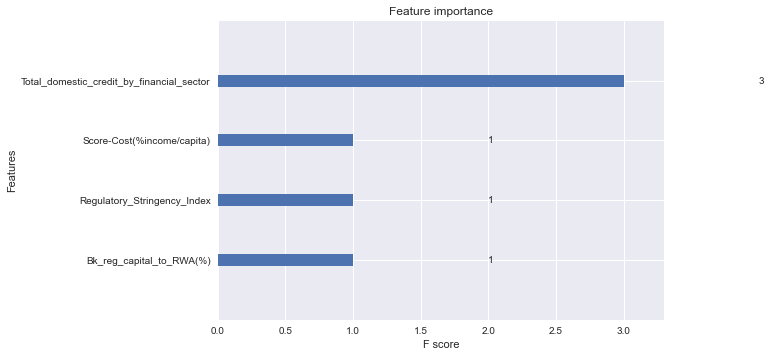

In [542]:
plot_importance(XGB_model_1)

## Plotting of the results

In [144]:
y_pred=pd.Series(y_pred_XGB_2)

pa=pd.DataFrame()
pa["Date"]=X_test.reset_index().Date.iloc[0:-1]
pa["Prediction"]=y_pred[0:]
pa["Actual Value"]=Y_test["log_Bigtech_credit"].values[0:-1]
pa.head(2)

,Date,Prediction,Actual Value
0,2017-01-01,4.562748,4.547329
1,2018-01-01,4.562748,4.533137


<ipython-input-146-070ea6b9e39e>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


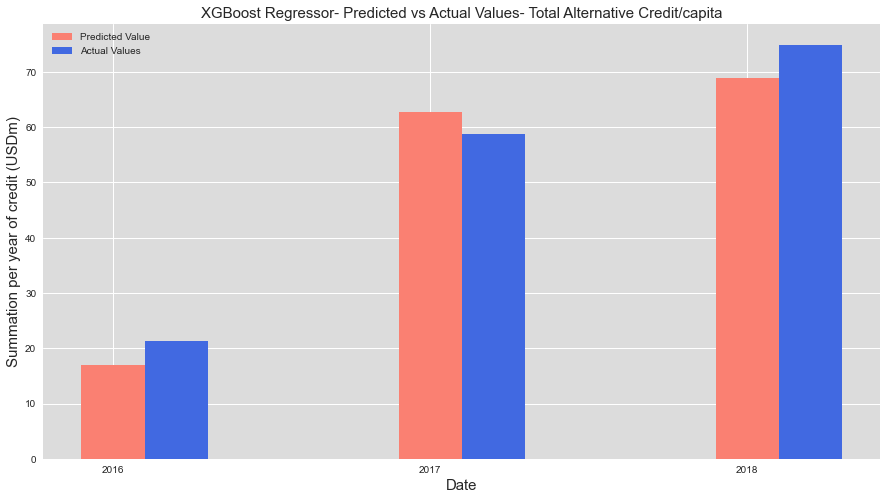

In [146]:
prediction=pa.groupby("Date")['Prediction'].sum()
actual=pa.groupby("Date")['Actual Value'].sum()
x=[2016, 2017, 2018]
w=0.2

bar1=np.arange(len(x))
bar2= [i+w for i in bar1]

plt.figure(figsize=(15,8))

plt.bar(bar1,prediction,w, label="Predicted Value",color="salmon")
plt.bar(bar2,actual, w, label="Actual Values",color="royalblue")


plt.xticks(bar1, x,size=10)
plt.yticks(size=10)

plt.ylabel('Summation  per year of log credit (USDm)',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.title('XGBoost Regressor- Predicted vs Actual Values- Log(Bigtech Credit)',fontsize=15)
plt.grid(True)
ax=plt.axes()
ax.set_facecolor("gainsboro")
plt.legend()

### ####LINEAR REGRESSION######

In [585]:
Lin_reg = linear_model.LinearRegression()

param_grid={"fit_intercept": (True, False), 
            "normalize":(True,False) }

random_search=RandomizedSearchCV(lin_reg,param_distributions=param_grid,n_iter=25000,
                                 scoring=("neg_root_mean_squared_error"),
                                 n_jobs=-1,cv=cv,verbose=3)
random_search.fit(X_test,Y_test)

C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=25000. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LinearRegression(), n_iter=25000, n_jobs=-1,
                   param_distributions={'fit_intercept': (True, False),
                                        'normalize': (True, False)},
                   scoring='neg_root_mean_squared_error', verbose=3)

## Base Model

In [586]:
random_search.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

In [587]:
lin_regressor=LinearRegression(normalize=True)

lin_regressor.fit(X_train,Y_train)
y_pred_lin=lin_regressor.predict(X_test)
y_train_pred_lin=lin_regressor.predict(X_train)

print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred_lin)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred_lin)));
print("#######################################",
      "##################################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred_lin));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred_lin));

Training accuracy mean_squared_error: 1.4505356521001747
Testing accuracy mean_squared_error: 1.584837006061826
####################################### ##################################################
Training accuracy r2_score: 0.5629851897878815
Testing accuracy r2_score: 0.5017097003474651


## Sequential Forward Feature Selection 

In [588]:
#Sequential Forward Feature Selection
sffs6=SFS(estimator=lin_regressor,
          k_features=28,
          forward=True,
          floating=False,
          scoring="neg_root_mean_squared_error",
          cv=cv,
          n_jobs=-1)

sffs6.fit(X_train,Y_train)

print('\nSequential Forward Selection (k=27). Index:')
print(sffs6.k_feature_idx_)
print("\nSequential Forward Feature Selection. Names:")
print(sffs6.k_feature_names_)
print('CV Score:')
print(sffs6.k_score_)


Sequential Forward Selection (k=27). Index:
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27)

Sequential Forward Feature Selection. Names:
('Total_domestic_credit_by_financial_sector', 'GDP/capita(USD $)', 'GDP/capita (USD $)^2', 'GDP growth (annual %)', 'CPI(2010=100)', 'Bank_Branches_per_100k_adults', 'Individuals_using_Internet(%pop)', 'Lerner Index', 'Starting a business - Score', 'Score-Time(days)', 'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)', 'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)', 'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)', 'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)', 'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)', 'Stockstraded_totalvalue(%GDP)', 'MobPhone_Subcrip(per100adults)', 'R&D_Expenditure(%GDP)', 'Financial Institutions Access Index', 'Regulatory_Stringency_Index', 'dmmy_Low income', 'dmmy_Lower middle income', 'dmmy_Upper middle i

In [606]:
sffs6.subsets_;

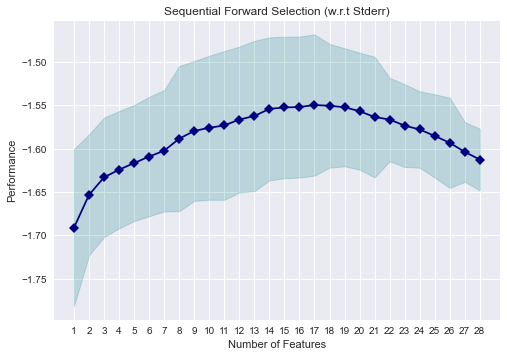

In [119]:
fig= plot_sfs(sffs6.get_metric_dict(),
             kind="std_err",
             color="navy",
             bcolor="teal",
             marker='D',)
plt.title("Sequential Forward Selection (w.r.t Stderr)")
plt.grid(True)
plt.show()

## Improving the results

In [602]:
selected={'Total_domestic_credit_by_financial_sector',
   'GDP/capita(USD $)',
   'GDP/capita (USD $)^2',
   'GDP growth (annual %)',
   'CPI(2010=100)',
   'Bank_Branches_per_100k_adults',
   'Individuals_using_Internet(%pop)',
   'Starting a business - Score',
   'Score-Time(days)',
   'Score-Paid-Min-Capital',
   'Score-Cost(%income/capita)',
   'Enforcement_fees(%claim)',
   'Enforcement_ judgement(days)',
   'Bk_reg_capital_to_RWA(%)',
   'Loans_from_nonresidbanks_toGDP(%)',
   'Total_factoring_vol_to_GDP(%)',
   'GlobalLeasing_Vol_toGDP(%)',
   'MobPhone_Subcrip(per100adults)',
   'R&D_Expenditure(%GDP)',
   'Financial Institutions Access Index',
   'Regulatory_Stringency_Index',
   'dmmy_Lower middle income',
   'dmmy_Upper middle income'}

X_train_sffs6=X_train.loc[:,selected]
X_test_sffs6=X_test.loc[:,selected]

lin_regressor.fit(X_train_sffs6,Y_train)
y_pred_LIN_2=lin_regressor.predict(X_test_sffs6)
y_train_pred_LIN_2=lin_regressor.predict(X_train_sffs6)


print("AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS")
print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred_LIN_2)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred_LIN_2)));

print("#########################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred_LIN_2));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred_LIN_2));

AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS
Training accuracy mean_squared_error: 1.4780845645712104
Testing accuracy mean_squared_error: 1.5787116966163608
#########################################
Training accuracy r2_score: 0.5462277813437983
Testing accuracy r2_score: 0.5055539871827044


<Figure size 4320x1080 with 0 Axes>

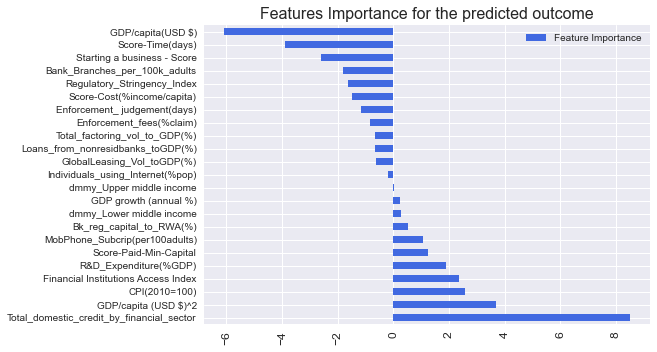

In [608]:
df_features_importance=pd.DataFrame(lin_regressor.coef_, index=selected,
                                   columns=["Feature Importance"]).sort_values("Feature Importance",ascending=False)
plt.figure(figsize=(60,15))
df_features_importance.plot(kind='barh',color="royalblue")
plt.grid(True)
plt.xticks(fontsize=12, rotation=90)
plt.title("Features Importance for the predicted outcome",fontsize=16)
plt.yticks(fontsize=10)
plt.savefig("Features Importances_BIg.png");

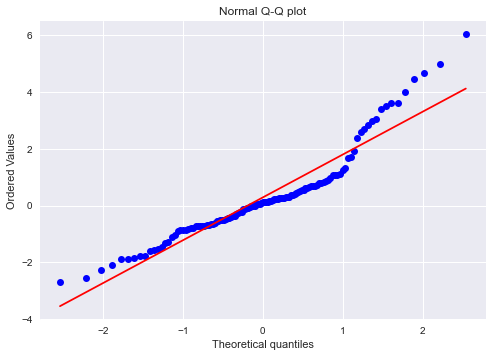

In [122]:
res1=pd.Series(Y_test-y_pred_LIN_2)

stats.probplot(res1, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

### Plotting of the Results

In [177]:
y_pred_lin=y_pred_LIN_2.ravel()

y_pred=pd.Series(y_pred_lin)

pa=pd.DataFrame()
pa["Date"]=X_test.reset_index().Date.iloc[0:-1]
pa["Prediction"]=y_pred_lin[1:]
pa["Actual Value"]=Y_test["log_Bigtech_credit"].values[0:-1]
pa.head(2)

,Date,Prediction,Actual Value
0,2017-01-01,5.421879,4.547329
1,2018-01-01,6.009742,4.533137


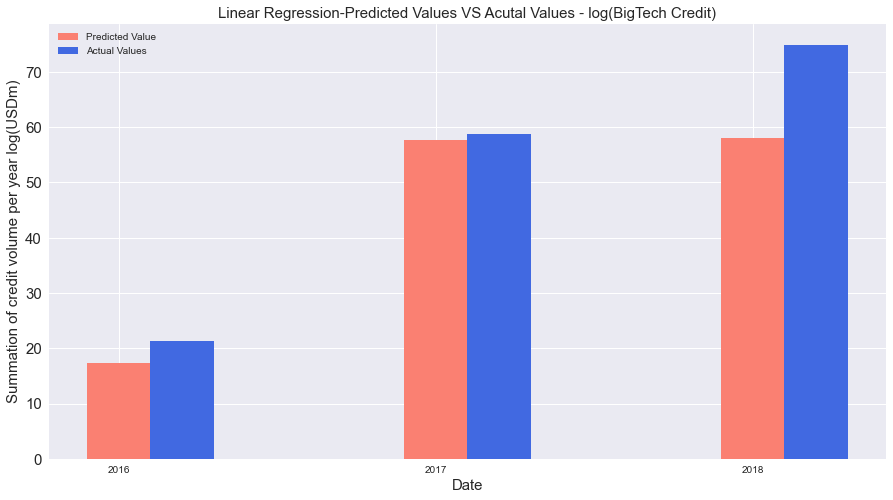

In [178]:
prediction=pa.groupby("Date")['Prediction'].sum()
actual=pa.groupby("Date")['Actual Value'].sum()
x=[2016, 2017, 2018]
w=0.2

bar1=np.arange(len(x))
bar2= [i+w for i in bar1]

plt.figure(figsize=(15,8))

plt.bar(bar1,prediction,w, label="Predicted Value",color="salmon")
plt.bar(bar2,actual, w, label="Actual Values",color="royalblue")


plt.xticks(bar1, x)
plt.yticks(size=15)

plt.ylabel('Summation of credit volume per year log(USDm)',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.title('Linear Regression- log(BigTech Credit)',fontsize=15)
plt.legend()

# 3.) Log-FinTech Credit

In [614]:
df_data2.columns

Index(['Date', 'Country Name', 'Country Code', 'Income Leve', 'region',
       'sub-region', 'log_Fintech_credit', 'log_Total_Alternative_credit',
       'log_Bigtech_credit', 'Total_domestic_credit_by_financial_sector',
       'GDP/capita(USD $)', 'GDP/capita (USD $)^2', 'GDP growth (annual %)',
       'CPI(2010=100)', 'Bank_Branches_per_100k_adults',
       'Individuals_using_Internet(%pop)', 'Lerner Index',
       'Starting a business - Score', 'Score-Time(days)',
       'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)',
       'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)',
       'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)',
       'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)',
       'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)',
       'Stockstraded_totalvalue(%GDP)', 'MobPhone_Subcrip(per100adults)',
       'R&D_Expenditure(%GDP)', 'Financial Institutions Access Index',
       'Regulatory_Stringency_Index'],
 

In [615]:

X_F_1=df_data2.drop(columns=['log_Total_Alternative_credit',
       'log_Bigtech_credit',"region","sub-region"])

X_F_1_nonan=X_F_1.dropna(axis=0, how="any")
X_F_1_nonan=pd.get_dummies(data=X_F_1_nonan,columns=["Income Leve"],prefix="dmmy",drop_first=True)
X_F_1_nonan['log_Fintech_credit']=abs(X_F_1_nonan['log_Fintech_credit'])
X_F_1_nonan.shape

(410, 32)

### Scaling the Data

In [616]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled=scaler.fit_transform(X_F_1_nonan.drop(columns=["Date",'log_Fintech_credit','Country Name','Country Code']))
#Creating a new DataFrame with the scaled data
scaled_df=pd.DataFrame(data=scaled,columns=X_F_1_nonan.drop(columns=["Date",'log_Fintech_credit','Country Name','Country Code']).columns)

df_F1=X_F_1_nonan.copy()
df_F1[scaled_df.columns]=np.array(scaled_df)
#df_F1['Country']=list(df_F1["Country Name"])

df_F1=df_F1.set_index(['Country Name','Date'])

### Train Test Split

In [617]:
X_3=df_F1.drop(columns=["Country Code","log_Fintech_credit"])
Y_3=df_F1["log_Fintech_credit"]

X_train, X_test, Y_train, Y_test = train_test_split(X_2, Y_2, test_size=.3, random_state=1)

In [618]:
print("Checking the length of the features´ training sample:", X_train.shape)
print("Checking the length of the targets´ training sample:", Y_train.shape)

Checking the length of the features´ training sample: (287, 28)
Checking the length of the targets´ training sample: (287,)


# ####XGBOOST####

In [619]:
XGBreg=XGBRegressor(verbosity=0, use_rmm=True,random_state=42)
param_grid={"base_score":[int(x) for x in np.linspace(0.0,30.0)],
    "booster": ("gbtree","gblinear","dart"),
    "max_depth":[int(x) for x in np.linspace(2,30,1)],#How much depth the tree is allowed to grow. When you increase the max depth the model tends to overfit. Its usually employed as a regularization parameter
    "subsample":np.linspace(0,1,10,dtype=float)[1:].round(3), #How much % of data are you taking for each of the tree building. As we increase the subsample it overfitts
    "colsample_bylevel":np.linspace(0,1,10,dtype=float)[1:].round(3), #For every level it only considers a given % of features for each level. Also regularzation effect is you reduced it
    "colsample_bytree":np.linspace(0,1,10,dtype=float)[1:].round(3),
    "min_child_weight":[int(x) for x in np.linspace(1,100,1)], #If you increase it, it actually regularizes it
    "reg_lambda":np.linspace(0,1,11,dtype=float)[1:].round(3),
    "reg_alpha":np.linspace(0,1,11,dtype=float)[1:].round(3),
    "n_estimators": [int(x) for x in np.linspace(2,200,1)], #number of trees. Gradient boosting builds estimators serially. Each estimator or trees is actually boosting the next one.As we increase the estimators, the speed comes down. Better keeping it low
    "learning_rate":np.linspace(0.01,1,10,dtype=float)[1:].round(3) #If you increase it the algorithm learns faster, but it actually does not give you proper results. keeping the l rate small is good,
                                                                    #but if its too small it takes ages to compute.
}

In [620]:
#RANDOMIZED SEARCH FOR HYPER-PARAMETER TUNNING

random_search=RandomizedSearchCV(XGBreg,param_distributions=param_grid,n_iter=10000,
                                 scoring=("neg_root_mean_squared_error"),
                                 n_jobs=-1,cv=cv,verbose=3)
random_search.fit(X_test,Y_test);

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


## Base Model 

In [621]:
random_search.best_estimator_ 

XGBRegressor(base_score=0, booster='dart', colsample_bylevel=0.556,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1.0, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=1.0, reg_lambda=0.5, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', use_rmm=True, validate_parameters=1,
             verbosity=0)

In [622]:
XGB_regressor=xgb.XGBRegressor(base_score=0, booster='gbtree', colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=0.778, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1.0, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=2, n_jobs=1, num_parallel_tree=1, random_state=42,
             reg_alpha=0.3, reg_lambda=1.0, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', use_rmm=True, validate_parameters=1,
             verbosity=0)

In [626]:
XGB_model=XGBRegressor(base_score=0, booster='gbtree', colsample_bylevel=1.0,
             colsample_bynode=1, colsample_bytree=0.778, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=1.0, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=np.nan, monotone_constraints='()',
             n_estimators=2, n_jobs=1, num_parallel_tree=1, random_state=42,
             reg_alpha=0.3, reg_lambda=1.0, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', use_rmm=True, validate_parameters=1,
             verbosity=0)

XGB_model.fit(X_train,Y_train)
y_pred=XGB_model.predict(X_test)
y_train_pred=XGB_model.predict(X_train)


print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred)));

print("#########################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred));

Training accuracy mean_squared_error: 1.3310138005642687
Testing accuracy mean_squared_error: 1.7123362324240516
#########################################
Training accuracy r2_score: 0.6320367407802967
Testing accuracy r2_score: 0.41831037420082173


C:\Users\Pedro Romero\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


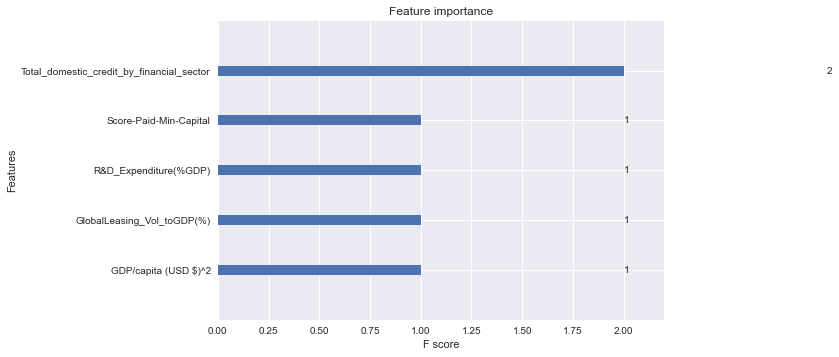

In [418]:
# plot feature importance
plot_importance(XGB_model)
plt.show()

## Sequential Forward Feature Selection

In [627]:
#Sequential Forward Feature Selection

sffs7=SFS(estimator=XGB_model,
          k_features=28,
          forward=True,
          floating=False,
          scoring="neg_root_mean_squared_error",
          cv=cv,
          n_jobs=-1)

sffs7.fit(X_train,Y_train)

print('\nSequential Forward Selection (k=27). Index:')
print(sffs7.k_feature_idx_)
print("\nSequential Forward Feature Selection. Names:")
print(sffs7.k_feature_names_)
print('CV Score:')
print(sffs7.k_score_)


Sequential Forward Selection (k=27). Index:
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27)

Sequential Forward Feature Selection. Names:
('Total_domestic_credit_by_financial_sector', 'GDP/capita(USD $)', 'GDP/capita (USD $)^2', 'GDP growth (annual %)', 'CPI(2010=100)', 'Bank_Branches_per_100k_adults', 'Individuals_using_Internet(%pop)', 'Lerner Index', 'Starting a business - Score', 'Score-Time(days)', 'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)', 'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)', 'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)', 'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)', 'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)', 'Stockstraded_totalvalue(%GDP)', 'MobPhone_Subcrip(per100adults)', 'R&D_Expenditure(%GDP)', 'Financial Institutions Access Index', 'Regulatory_Stringency_Index', 'dmmy_Low income', 'dmmy_Lower middle income', 'dmmy_Upper middle i

In [647]:
sffs7.subsets_;

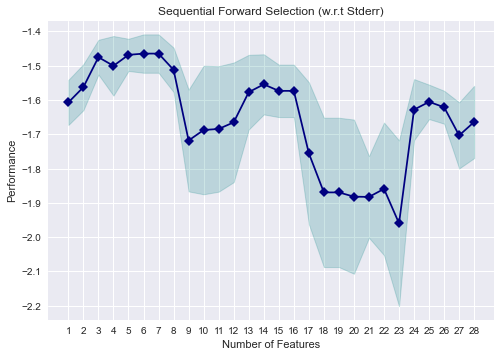

In [196]:
fig= plot_sfs(sffs7.get_metric_dict(),
             kind="std_err",
             color="navy",
             bcolor="teal",
             marker='D',)
plt.title("Sequential Forward Selection (w.r.t Stderr)")
plt.grid(True)
plt.show()

### Improving the model 

In [646]:
selected={'Total_domestic_credit_by_financial_sector',
   'GDP/capita(USD $)',
   'GDP/capita (USD $)^2',
   'GDP growth (annual %)',
   'CPI(2010=100)',
   'Bank_Branches_per_100k_adults',
   'Individuals_using_Internet(%pop)',
   'Lerner Index',
   'Starting a business - Score',
   'Score-Time(days)',
   'Score-Paid-Min-Capital',
   'Enforcement_ judgement(days)',
   'Provisions_nonperf_loans(%)',
   'Total_factoring_vol_to_GDP(%)',
   'Stockstraded_totalvalue(%GDP)',
   'MobPhone_Subcrip(per100adults)',
   'R&D_Expenditure(%GDP)',
   'Financial Institutions Access Index',
   'Regulatory_Stringency_Index',
   'dmmy_Low income'}

X_train_sffs7=X_train.loc[:,selected]
X_test_sffs7=X_test.loc[:,selected]

XGB_model.fit(X_train_sffs7,Y_train)
y_pred=XGB_model.predict(X_test_sffs7)
y_train_pred=XGB_model.predict(X_train_sffs7)

print("AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS")
print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred)));

print("#########################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred));


AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS
Training accuracy mean_squared_error: 1.3042740349243838
Testing accuracy mean_squared_error: 1.6931121037356422
#########################################
Training accuracy r2_score: 0.646672828169979
Testing accuracy r2_score: 0.43129813217088964


C:\Users\Pedro Romero\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### FEATURES´ IMPORTANCE

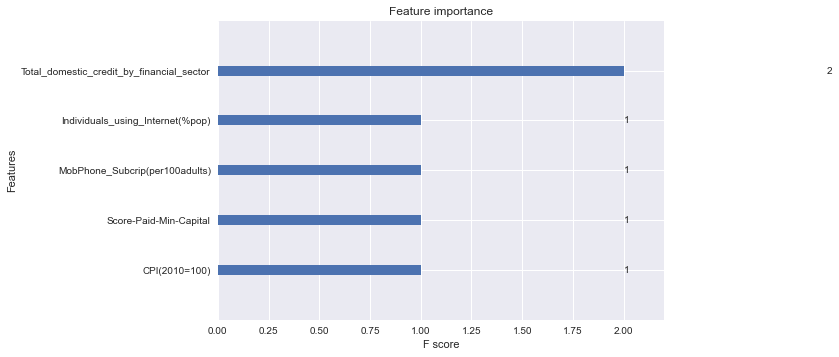

In [678]:
plot_importance(XGB_model)
plt.show()

## Plotting of the Results

In [200]:
pa=pd.DataFrame()
pa["Date"]=X_test.reset_index().Date.iloc[0:-1]
pa["Prediction"]=y_pred[1:]
pa["Actual Value"]=Y_test["log_Fintech_credit"].values[0:-1]
pa.head()

,Date,Prediction,Actual Value
0,2017-01-01,8.746763,8.869468
1,2018-01-01,1.358214,9.139161
2,2016-01-01,2.028829,2.432736
3,2017-01-01,1.358214,3.288402
4,2016-01-01,1.358214,1.935860


<ipython-input-201-ff0ab6c4f552>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


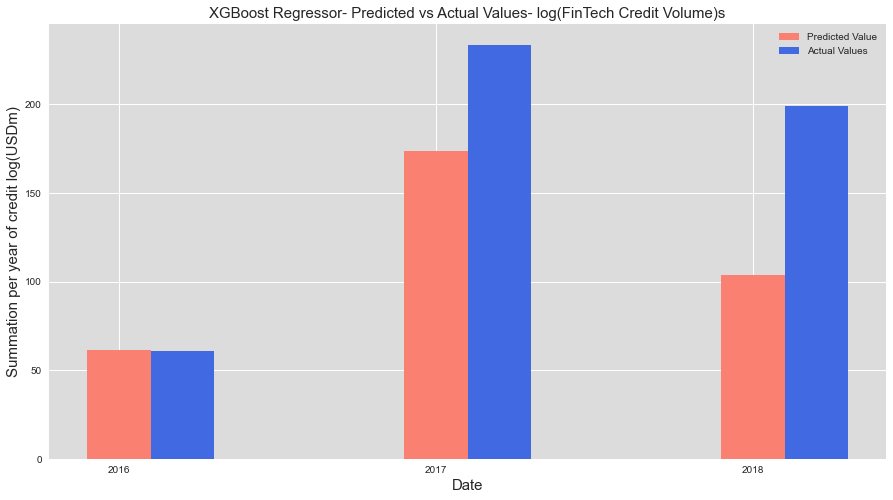

In [201]:
prediction=pa.groupby("Date")['Prediction'].sum()
actual=pa.groupby("Date")['Actual Value'].sum()
x=[2016, 2017, 2018]
w=0.2

bar1=np.arange(len(x))
bar2= [i+w for i in bar1]

plt.figure(figsize=(15,8))

plt.bar(bar1,prediction,w, label="Predicted Value",color="salmon")
plt.bar(bar2,actual, w, label="Actual Values",color="royalblue")


plt.xticks(bar1, x,size=10)
plt.yticks(size=10)

plt.ylabel('Summation per year of credit log(USDm)',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.title('XGBoost Regressor- Predicted vs Actual Values- log(FinTech Credit Volume)s',fontsize=15)
plt.grid(True)
ax=plt.axes()
ax.set_facecolor("gainsboro")
plt.legend()

# ####Linear Regression####

In [648]:
Lin_reg = linear_model.LinearRegression()

param_grid={"fit_intercept": (True, False), 
            "normalize":(True,False) }

random_search=RandomizedSearchCV(lin_reg,param_distributions=param_grid,n_iter=10000,
                                 scoring=("neg_root_mean_squared_error"),
                                 n_jobs=-1,cv=cv,verbose=3)
random_search.fit(X_test,Y_test)

C:\Users\Pedro Romero\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 4 is smaller than n_iter=10000. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=LinearRegression(), n_iter=10000, n_jobs=-1,
                   param_distributions={'fit_intercept': (True, False),
                                        'normalize': (True, False)},
                   scoring='neg_root_mean_squared_error', verbose=3)

## Base Model

In [649]:
random_search.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

In [650]:
lin_regressor=LinearRegression(fit_intercept=False, normalize=True)

lin_regressor.fit(X_train,Y_train)
y_pred_lin=lin_regressor.predict(X_test)
y_train_pred_lin=lin_regressor.predict(X_train)

print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred_lin)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred_lin)));
print("#######################################",
      "##################################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred_lin));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred_lin));

Training accuracy mean_squared_error: 1.4506980089545034
Testing accuracy mean_squared_error: 1.585547651684914
####################################### ##################################################
Training accuracy r2_score: 0.5628873551423317
Testing accuracy r2_score: 0.5012627304564037


## Forward Feature Selection

In [651]:
#Sequential Forward Feature Selection
sffs9=SFS(estimator=lin_regressor,
          k_features=28,
          forward=True,
          floating=False,
          scoring="neg_root_mean_squared_error",
          cv=cv,
          n_jobs=-1)

sffs9.fit(X_test,Y_test)

print('\nSequential Forward Selection (k=27). Index:')
print(sffs9.k_feature_idx_)
print("\nSequential Forward Feature Selection. Names:")
print(sffs9.k_feature_names_)
print('CV Score:')
print(sffs9.k_score_)


Sequential Forward Selection (k=27). Index:
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27)

Sequential Forward Feature Selection. Names:
('Total_domestic_credit_by_financial_sector', 'GDP/capita(USD $)', 'GDP/capita (USD $)^2', 'GDP growth (annual %)', 'CPI(2010=100)', 'Bank_Branches_per_100k_adults', 'Individuals_using_Internet(%pop)', 'Lerner Index', 'Starting a business - Score', 'Score-Time(days)', 'Score-Paid-Min-Capital', 'Score-Cost(%income/capita)', 'Enforcement_fees(%claim)', 'Enforcement_ judgement(days)', 'Cost_Enforc_contracts(%claim)', 'Bk_reg_capital_to_RWA(%)', 'Provisions_nonperf_loans(%)', 'Loans_from_nonresidbanks_toGDP(%)', 'Total_factoring_vol_to_GDP(%)', 'GlobalLeasing_Vol_toGDP(%)', 'Stockstraded_totalvalue(%GDP)', 'MobPhone_Subcrip(per100adults)', 'R&D_Expenditure(%GDP)', 'Financial Institutions Access Index', 'Regulatory_Stringency_Index', 'dmmy_Low income', 'dmmy_Lower middle income', 'dmmy_Upper middle i

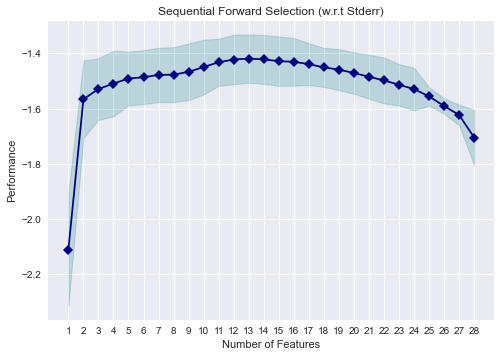

In [221]:
fig= plot_sfs(sffs9.get_metric_dict(),
             kind="std_err",
             color="navy",
             bcolor="teal",
             marker='D',)
plt.title("Sequential Forward Selection (w.r.t Stderr)")
plt.grid(True)
plt.show()

In [677]:
sffs9.subsets_;

In [676]:
selected_features={'Total_domestic_credit_by_financial_sector',
   'GDP/capita(USD $)',
   'GDP/capita (USD $)^2',
   'GDP growth (annual %)',
   'CPI(2010=100)',
   'Starting a business - Score',
   'Score-Time(days)',
   'Score-Paid-Min-Capital',
   'Enforcement_fees(%claim)',
   'Enforcement_ judgement(days)',
   'Stockstraded_totalvalue(%GDP)',
   'MobPhone_Subcrip(per100adults)',
   'R&D_Expenditure(%GDP)',
   'Financial Institutions Access Index',
   'dmmy_Lower middle income',
   'dmmy_Upper middle income'}

X_train_sffs9=X_train.loc[:,selected_features]
X_test_sffs9=X_test.loc[:,selected_features]

lin_regressor.fit(X_train_sffs9,Y_train)
y_pred_LIN_2=lin_regressor.predict(X_test_sffs9)
y_train_pred_LIN_2=lin_regressor.predict(X_train_sffs9)


print("AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS")
print("Training accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_train,y_train_pred_LIN_2)));
print("Testing accuracy mean_squared_error:", np.sqrt(mean_squared_error(Y_test,y_pred_LIN_2)));

print("#########################################")
print("Training accuracy r2_score:", r2_score(Y_train,y_train_pred_LIN_2));
print("Testing accuracy r2_score:", r2_score(Y_test,y_pred_LIN_2));


AFTER THE FEATURE SELECTION THE MODEL´S PERFORMANCE IS
Training accuracy mean_squared_error: 1.5261030920445333
Testing accuracy mean_squared_error: 1.527101464506079
#########################################
Training accuracy r2_score: 0.5162654753253298
Testing accuracy r2_score: 0.5373537853878017


## Plotting the Results

In [228]:
y_pred_lin=y_pred_LIN_2.ravel()

y_pred=pd.Series(y_pred_lin)

pa=pd.DataFrame()
pa["Date"]=X_test.reset_index().Date.iloc[0:-1]
pa["Prediction"]=y_pred_lin[1:]
pa["Actual Value"]=Y_test["log_Fintech_credit"].values[0:-1]
pa.head(2)

,Date,Prediction,Actual Value
0,2017-01-01,4.574374,8.869468
1,2018-01-01,2.036741,9.139161


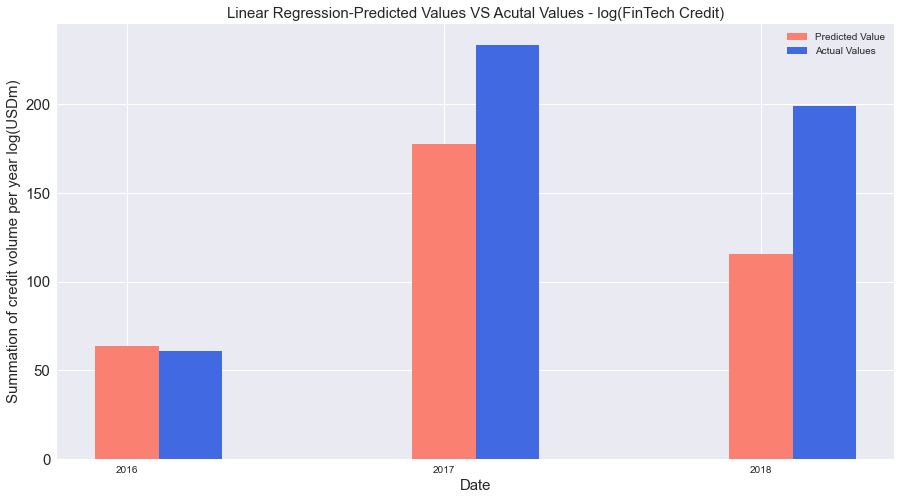

In [233]:
prediction=pa.groupby("Date")['Prediction'].sum()
actual=pa.groupby("Date")['Actual Value'].sum()
x=[2016, 2017, 2018]
w=0.2

bar1=np.arange(len(x))
bar2= [i+w for i in bar1]

plt.figure(figsize=(15,8))

plt.bar(bar1,prediction,w, label="Predicted Value",color="salmon")
plt.bar(bar2,actual, w, label="Actual Values",color="royalblue")


plt.xticks(bar1, x)
plt.yticks(size=15)

plt.ylabel('Summation of credit volume per year log(USDm)',fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.title('Linear Regression-Predicted Values VS Acutal Values - log(FinTech Credit)',fontsize=15)
plt.legend()